In [1]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY, date2num
import seaborn as sns
import time
import random
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller as adf
import os 
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

C:\Users\kaush\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Finding the folder in which the CSV files are stored
path = "C:/Users/kaush/Desktop/pair bank stocks/"
os.chdir(path)

In [3]:
filearr= []
filearr = os.listdir()
print(list(filearr))#printing the CSV files in the folder "pair bank stocks"

['AXISBANK.NS.csv', 'BANKBARODA.NS.csv', 'FEDERALBNK.NS.csv', 'HDFCBANK.NS.csv', 'ICICIBANK.NS.csv', 'KOTAKBANK.NS.csv', 'PNB.NS.csv', 'SBIN.NS.csv', 'YESBANK.NS.csv']


In [4]:
finaldf = pd.DataFrame()
list_ = []
R=[]
for i in filearr:
    df = pd.read_csv(path+i)
    df["Name"] =i.split(".")[0]
    list_.append(df[["Date","Name","Adj Close"]])
# storing all the 9 csv adjacent closing price data into one dataframe named "finaldf"
finaldf = pd.concat(list_, axis = 0, ignore_index = True) 

In [5]:
#converting the dataframe to a pivot table
res = finaldf.pivot_table(index=['Date'], columns=['Name'],values='Adj Close', aggfunc='first', fill_value=0)
res.head()

Name          AXISBANK  BANKBARODA  FEDERALBNK     HDFCBANK   ICICIBANK  \
Date                                                                      
2016-01-18  366.145111  124.796761   46.565105  1004.367310  192.090622   
2016-01-19  385.570831  124.250717   47.098663  1014.109070  196.955948   
2016-01-20  380.272919  120.279465   46.274075   996.975403  193.210129   
2016-01-21  401.415527  123.357185   46.031548  1001.576965  194.845764   
2016-01-22  416.131958  129.264420   47.147167  1008.724182  200.399628   

Name         KOTAKBANK        PNB        SBIN     YESBANK  
Date                                                       
2016-01-18  666.212036  90.849998  177.052277  118.845833  
2016-01-19  667.509705  92.449997  178.959747  123.420311  
2016-01-20  661.470459  87.250000  169.862579  117.079445  
2016-01-21  659.673645  88.599998  171.770065  118.537849  
2016-01-22  681.834106  92.500000  180.573761  123.918518

In [6]:
#Storing the pivot table to a csv file
res.to_csv(path+"final.csv")
#Summary of the pivot table
res.describe()

Name     AXISBANK  BANKBARODA  FEDERALBNK     HDFCBANK   ICICIBANK  \
count  763.000000  763.000000  763.000000   763.000000  763.000000   
mean   526.721637  147.148138   83.402197  1613.873032  271.142502   
std     65.626877   21.213533   21.431590   382.700161   50.816402   
min    366.145111   93.250000   41.472050   922.909668  157.564758   
25%    493.774185  136.282066   68.943237  1230.092407  230.525292   
50%    520.189087  149.617126   83.500000  1741.029907  275.081726   
75%    559.726165  162.711319   99.797604  1951.644714  307.238938   
max    730.150024  194.343414  125.006500  2202.149902  382.250000   

Name     KOTAKBANK         PNB        SBIN     YESBANK  
count   763.000000  763.000000  763.000000  763.000000  
mean    969.616134  117.059240  260.900979  266.163943  
std     212.572947   36.356201   40.183851   70.049535  
min     605.769775   59.700001  148.489151  117.079445  
25%     771.372986   82.525002  247.734611  212.367028  
50%     986.428528  120.550003  267.233276  276.671539  
75%    1145.574951  144.549995  288.224991  321.234024  
max    1408.449951  213.600006  337.500000  394.000000

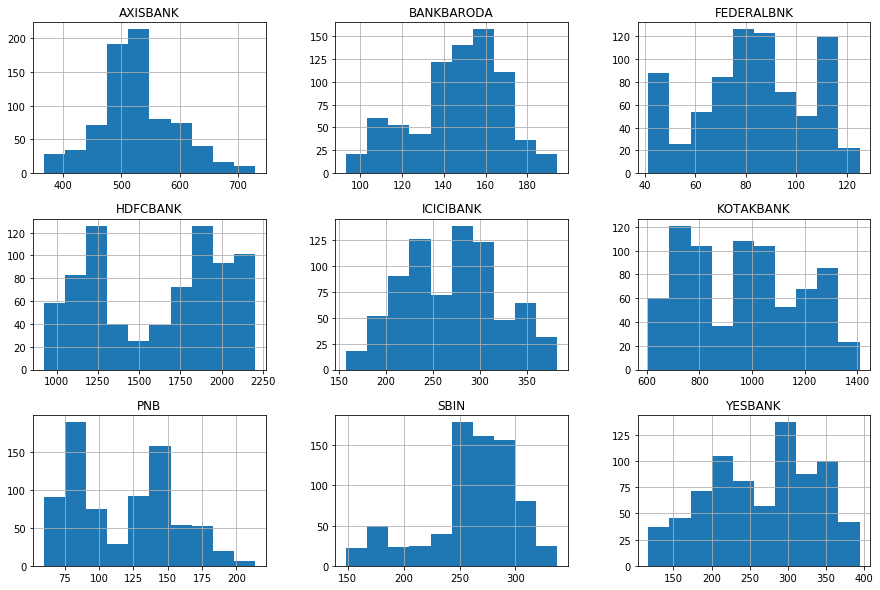

In [7]:
#Visualizing the Adjacent Plots
res.hist(figsize=(15,10))
plt.show()

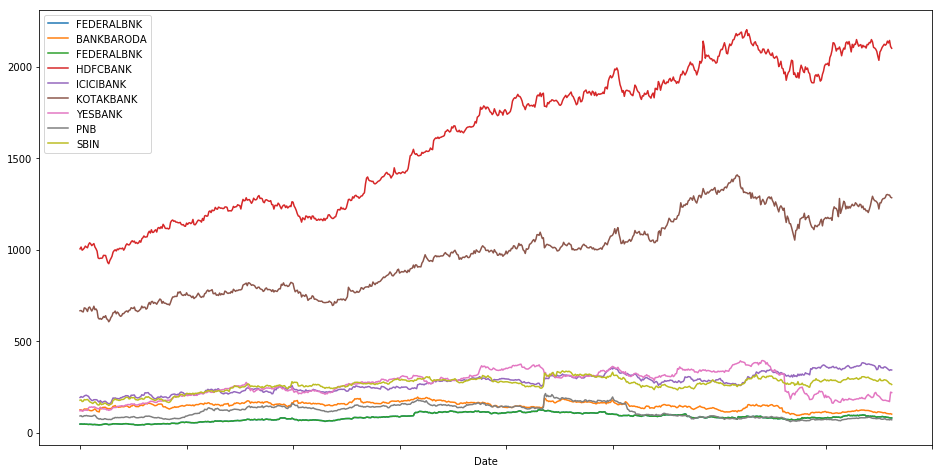

In [8]:
#Line graph of all adjacent closing price
res['FEDERALBNK'].plot(figsize=(16,8), legend ="FEDERALBNK")
res['BANKBARODA'].plot(figsize=(16,8), legend ="BANKBARODA")
res['FEDERALBNK'].plot(figsize=(16,8), legend ="FEDERALBNK")
res['HDFCBANK'].plot(figsize=(16,8), legend ="HDFCBANK")
res['ICICIBANK'].plot(figsize=(16,8), legend ="ICICIBANK")
res['KOTAKBANK'].plot(figsize=(16,8), legend ="KOTAKBANK")
res['YESBANK'].plot(figsize=(16,8), legend ="YESBANK")
res['PNB'].plot(figsize=(16,8), legend ="PNB")
res['SBIN'].plot(figsize=(16,8), legend ="SBIN")
plt.show()

In [9]:
#Fitting the linear regression model for each pair of stocks and taking resiudal from the linear regression output
def run_ADF_regression(t1,t2,i):
    x = res[t1]
    y = res[t2]
    reg = linear_model.LinearRegression()
    reg.fit(x.values.reshape((len(x), 1)),y)
    print(t1+'and'+t2)
    print(reg.intercept_)
    coef.append(reg.coef_)
    
    pred= x*reg.coef_ + reg.intercept_ 
    #Residual=Actual value - Predicted value
    residuals[i] = y-pred
    print(residuals[i])
    return reg
dep=['AXISBANK','BANKBARODA','FEDERALBNK','HDFCBANK','ICICIBANK','KOTAKBANK','PNB','SBIN','YESBANK']
indep=['AXISBANK','BANKBARODA','FEDERALBNK','HDFCBANK','ICICIBANK','KOTAKBANK','PNB','SBIN','YESBANK']
inc=0
coef=[]
residuals=pd.DataFrame()
for i in dep:
    for j in indep:
        if i!=j:
            
            x=run_ADF_regression(i,j,inc)
            inc=inc+1


AXISBANKandBANKBARODA
198.31767140226094
Date
2016-01-18   -37.950937
2016-01-19   -36.609827
2016-01-20   -41.095756
2016-01-21   -35.964091
2016-01-22   -28.627196
2016-01-25   -29.636683
2016-01-27   -29.659713
2016-01-28   -30.440084
2016-01-29   -34.893837
2016-02-01   -38.938174
2016-02-02   -40.979805
2016-02-03   -42.363390
2016-02-04   -39.919870
2016-02-05   -34.198481
2016-02-08   -29.667268
2016-02-09   -36.796073
2016-02-10   -44.743363
2016-02-11   -47.249632
2016-02-12   -48.158648
2016-02-15   -20.162443
2016-02-16   -29.730808
2016-02-17   -22.591678
2016-02-18   -22.526945
2016-02-19   -22.261686
2016-02-22   -22.215601
2016-02-23   -29.614077
2016-02-24   -28.726496
2016-02-25   -33.105983
2016-02-26   -29.698251
2016-02-29   -31.552446
                ...    
2019-01-07   -13.691189
2019-01-08   -11.234557
2019-01-09   -10.269336
2019-01-10   -10.434792
2019-01-11   -12.419059
2019-01-14   -13.328237
2019-01-15   -13.042234
2019-01-16   -12.811929
2019-01-17   -13.3

125.49105312900166
Date
2016-01-18   -12.785873
2016-01-19   -13.470466
2016-01-20   -17.227597
2016-01-21   -14.086900
2016-01-22    -8.469358
2016-01-25    -8.799055
2016-01-27    -8.378213
2016-01-28    -7.989989
2016-01-29   -12.617681
2016-02-01   -15.983621
2016-02-02   -17.136474
2016-02-03   -17.407637
2016-02-04   -14.934491
2016-02-05   -10.990656
2016-02-08    -7.392813
2016-02-09   -13.319317
2016-02-10   -20.817295
2016-02-11   -21.344823
2016-02-12   -23.452701
2016-02-15     1.698120
2016-02-16    -6.816387
2016-02-17     0.290389
2016-02-18     0.534148
2016-02-19     0.988309
2016-02-22     0.326695
2016-02-23    -5.638357
2016-02-24    -4.427713
2016-02-25    -7.636559
2016-02-26    -5.295302
2016-02-29    -6.189586
                ...    
2019-01-07   -27.355879
2019-01-08   -26.374664
2019-01-09   -27.703122
2019-01-10   -26.878534
2019-01-11   -29.113611
2019-01-14   -28.067197
2019-01-15   -28.021065
2019-01-16   -28.172996
2019-01-17   -29.271890
2019-01-18   -30

115.81915409913609
Date
2016-01-18   -12.282827
2016-01-19   -13.057920
2016-01-20   -15.936784
2016-01-21   -13.088115
2016-01-22    -8.238027
2016-01-25    -8.739179
2016-01-27    -8.413082
2016-01-28    -8.364013
2016-01-29   -12.451455
2016-02-01   -14.788619
2016-02-02   -15.636146
2016-02-03   -15.639769
2016-02-04   -13.030061
2016-02-05    -9.538306
2016-02-08    -6.328860
2016-02-09   -12.034178
2016-02-10   -18.435448
2016-02-11   -18.820686
2016-02-12   -21.119123
2016-02-15     2.813718
2016-02-16    -4.280286
2016-02-17     2.816656
2016-02-18     3.262864
2016-02-19     3.481541
2016-02-22     3.055067
2016-02-23    -2.442057
2016-02-24    -1.439030
2016-02-25    -4.484567
2016-02-26    -2.335204
2016-02-29    -3.513873
                ...    
2019-01-07   -28.698853
2019-01-08   -28.629572
2019-01-09   -29.529573
2019-01-10   -29.059593
2019-01-11   -31.023365
2019-01-14   -30.941182
2019-01-15   -30.941281
2019-01-16   -31.221399
2019-01-17   -32.330942
2019-01-18   -33

ADF Statistic: -3.180177
p-value: 0.021161
0


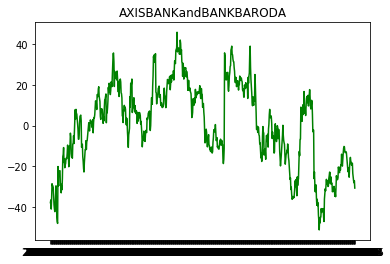

ADF Statistic: -3.044185
p-value: 0.030969
8


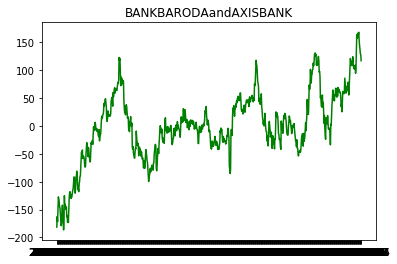

ADF Statistic: -3.766267
p-value: 0.003272
22


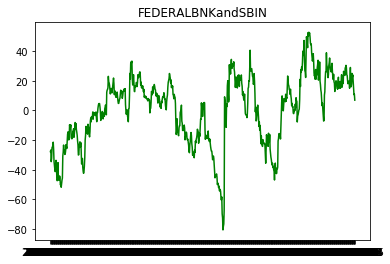

ADF Statistic: -2.923043
p-value: 0.042733
25


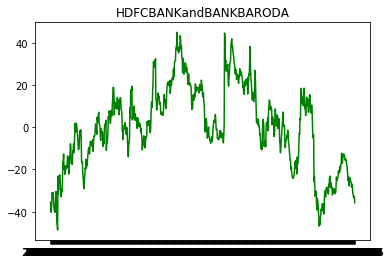

ADF Statistic: -3.350301
p-value: 0.012774
27


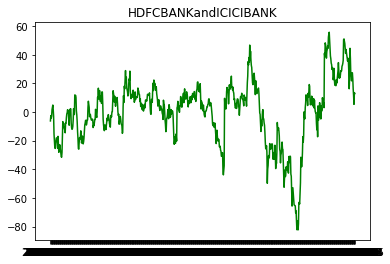

ADF Statistic: -2.871719
p-value: 0.048737
28


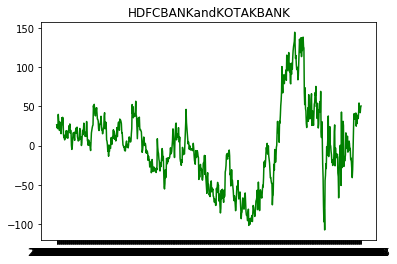

ADF Statistic: -2.985776
p-value: 0.036244
33


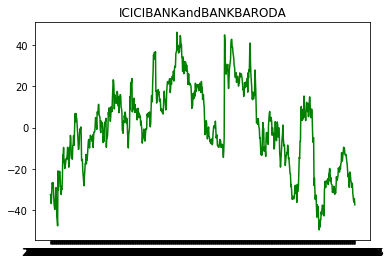

ADF Statistic: -3.117247
p-value: 0.025303
35


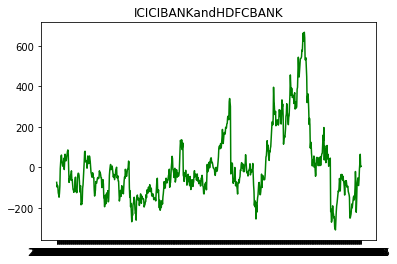

ADF Statistic: -3.104048
p-value: 0.026255
41


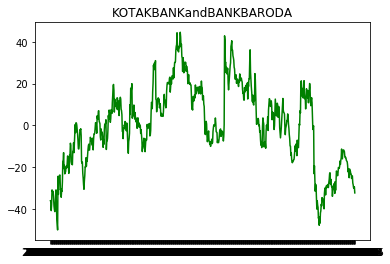

ADF Statistic: -2.911853
p-value: 0.043987
43


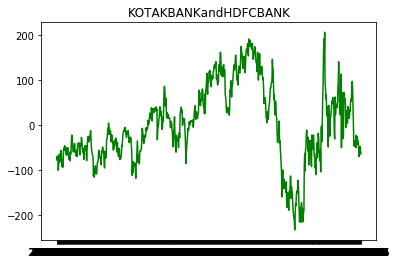

ADF Statistic: -3.224275
p-value: 0.018622
49


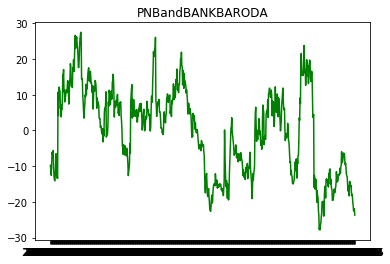

[0, 8, 22, 25, 27, 28, 33, 35, 41, 43, 49]


In [10]:
titles=[]
for i in dep:
        for j in indep:
            if i!=j:
                titles.append(i+'and'+j)                
paircount=[]
for i in range(len(residuals.columns)):
    data=residuals.values
    #Checking for stationarity using ADF test
    result = adfuller(data[:,i])
    #Storing and visualizing the pairs which have pvalue less than 5%
    if result[1] < 0.05:
        print('ADF Statistic: %f' % result[0])
        print('p-value: %f' % result[1])
        print(i)
        paircount.append(i)
        plt.title(titles[i])
        plt.plot(residuals[i], c='green')
        plt.show()
           
print(paircount) 

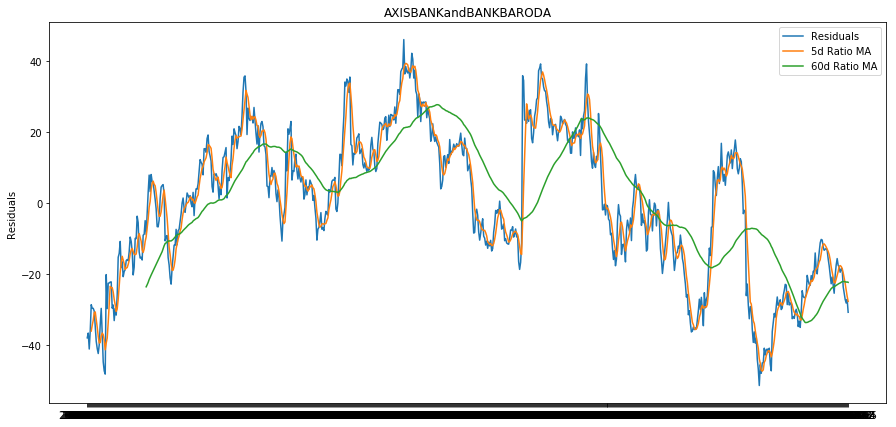

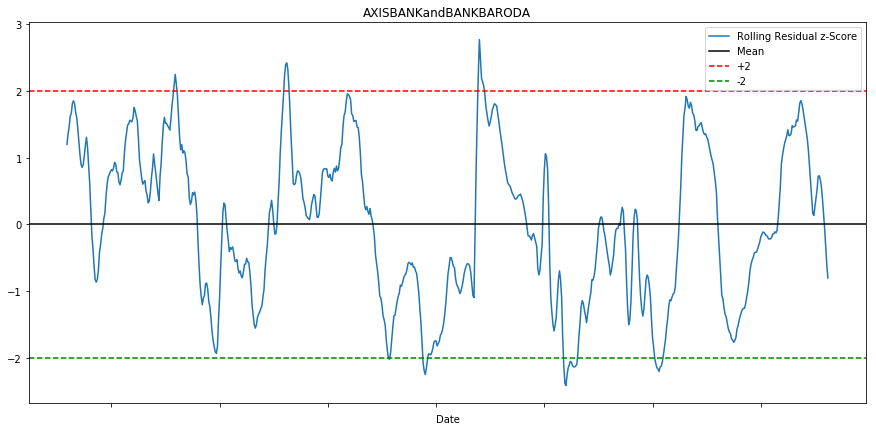

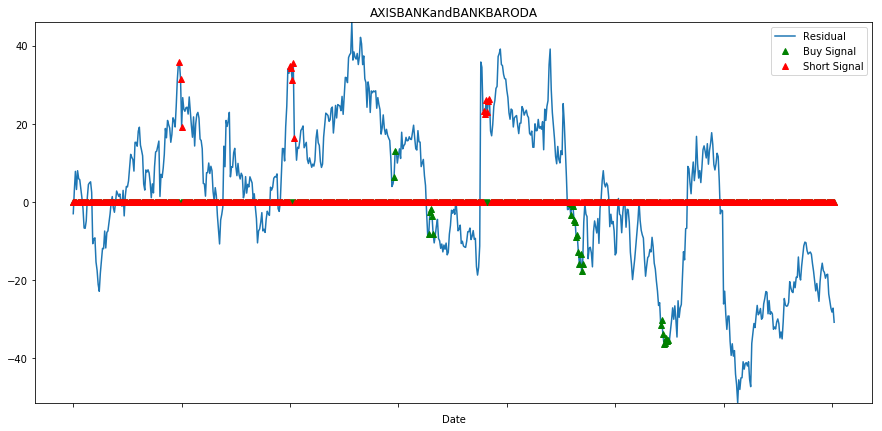

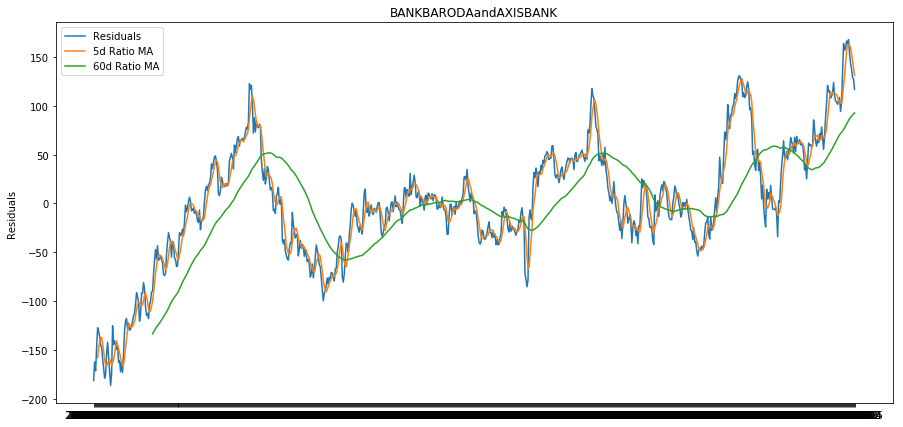

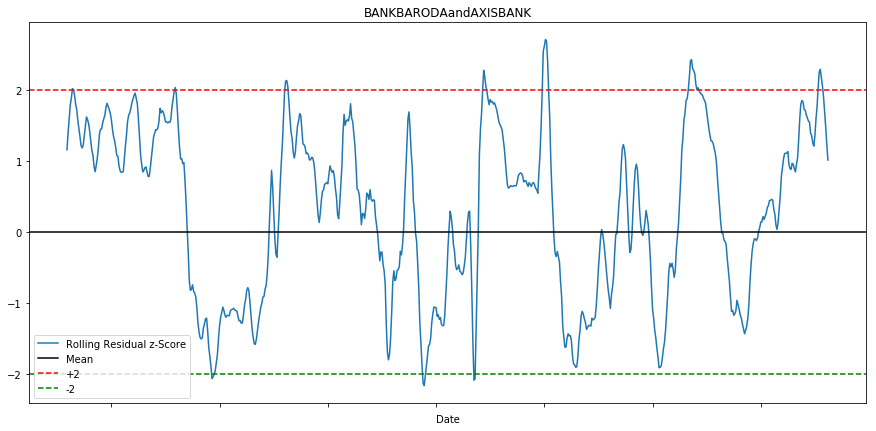

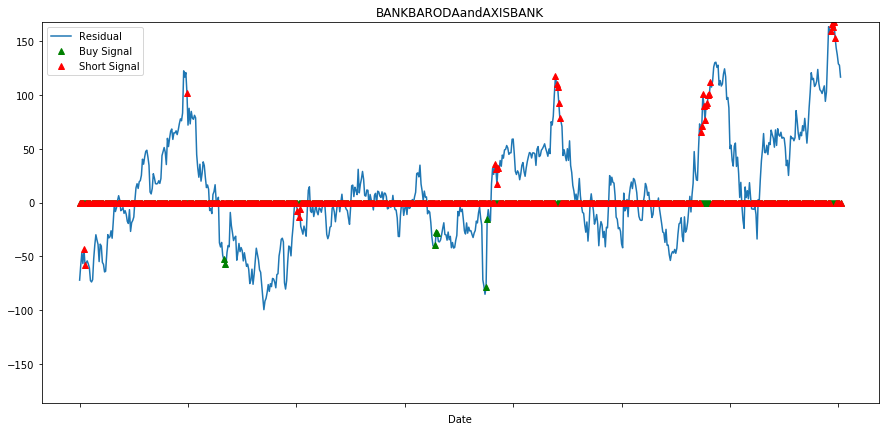

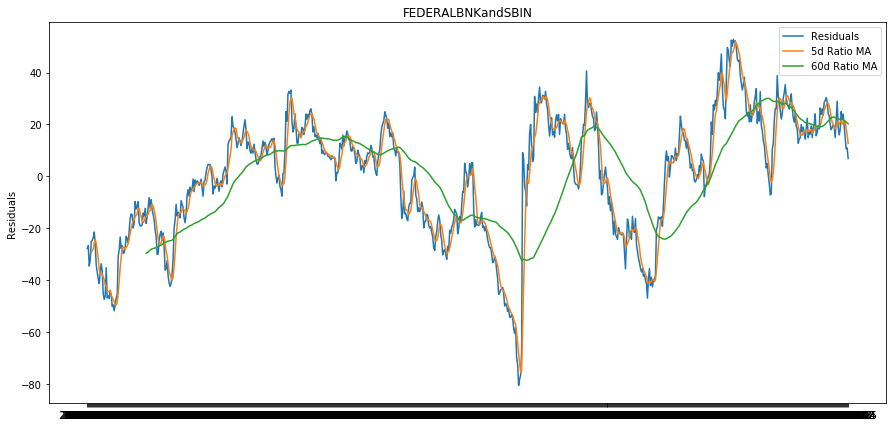

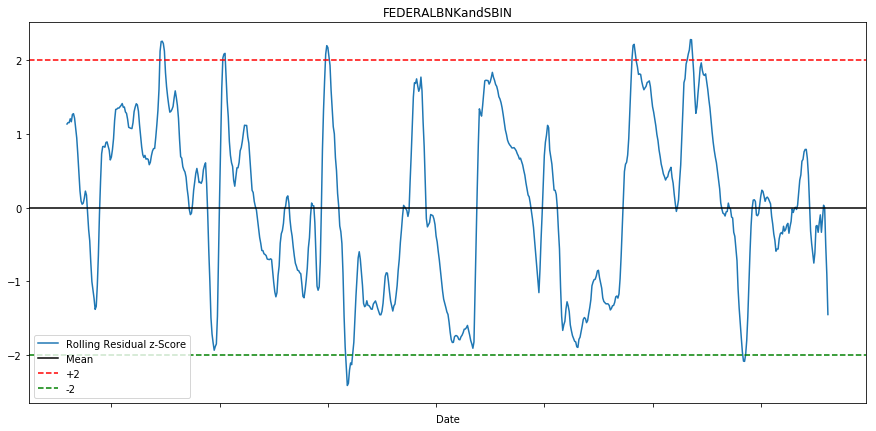

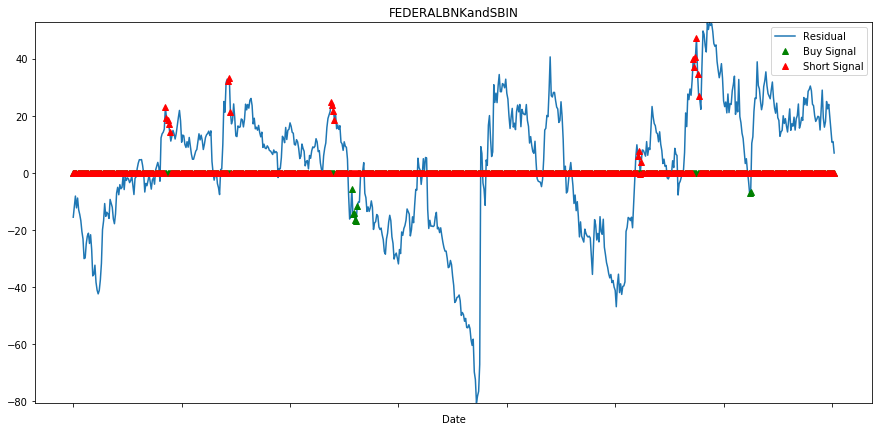

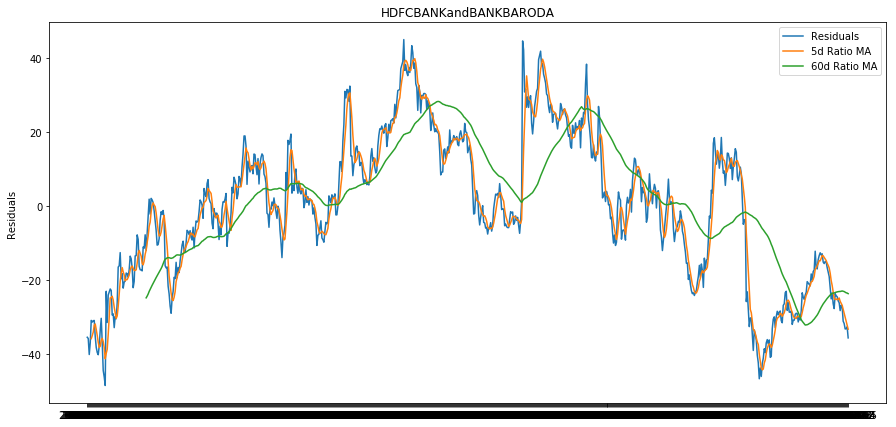

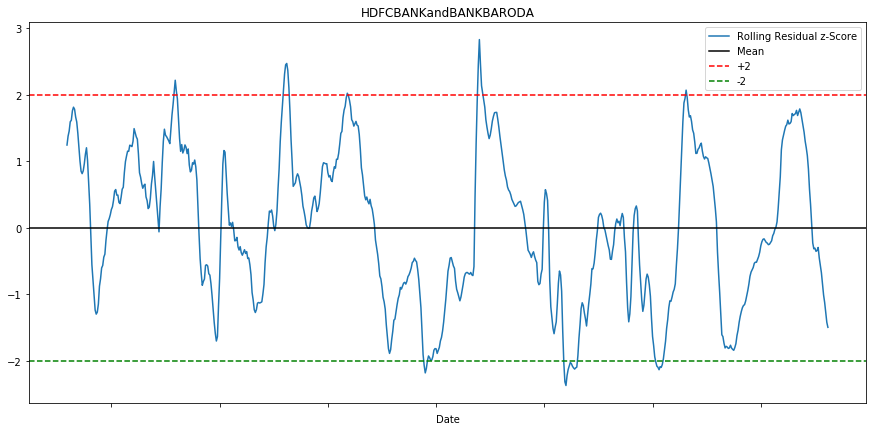

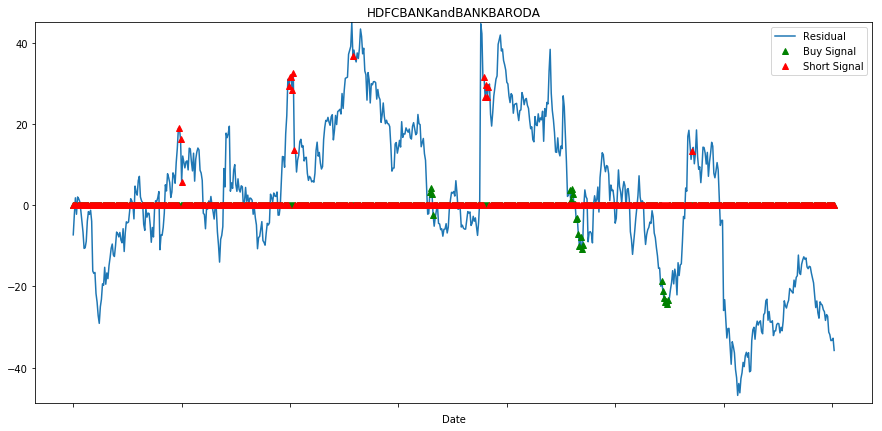

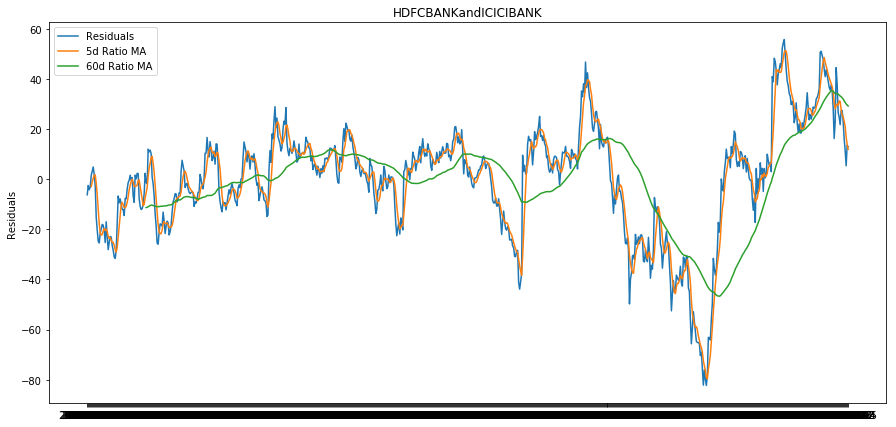

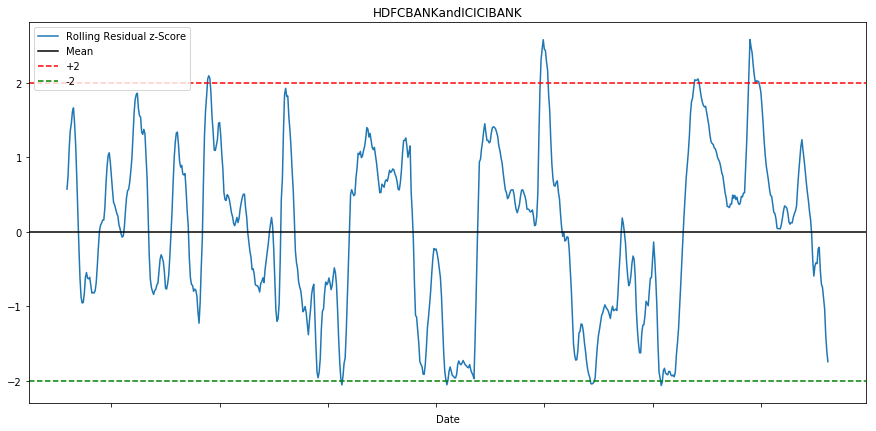

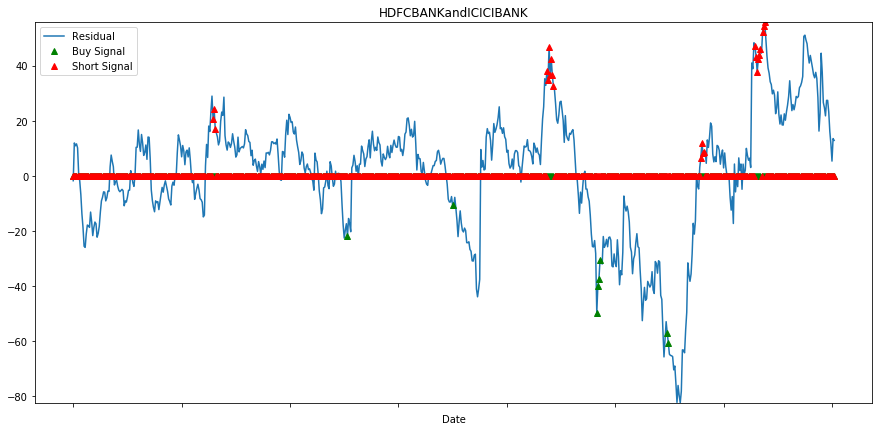

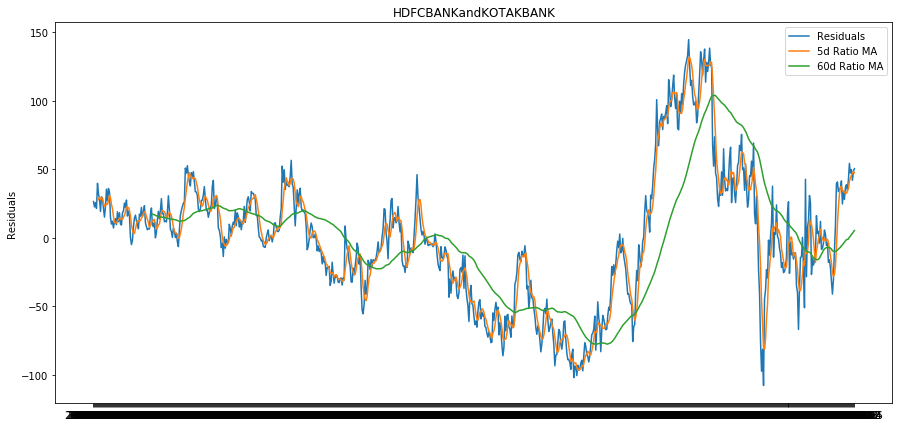

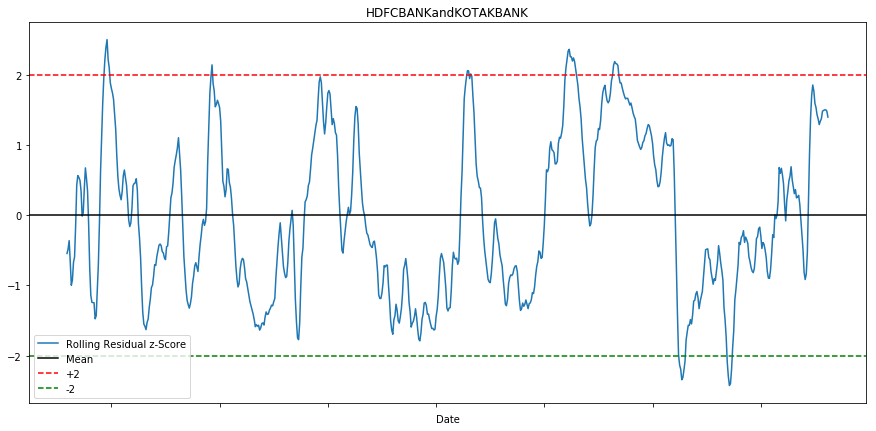

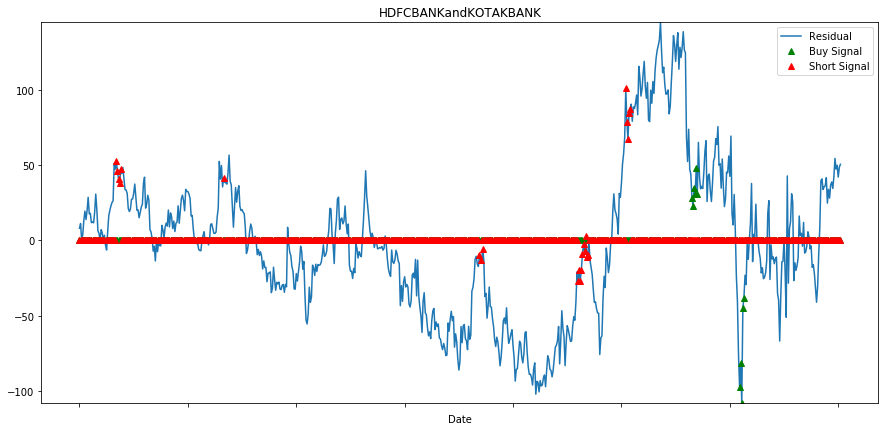

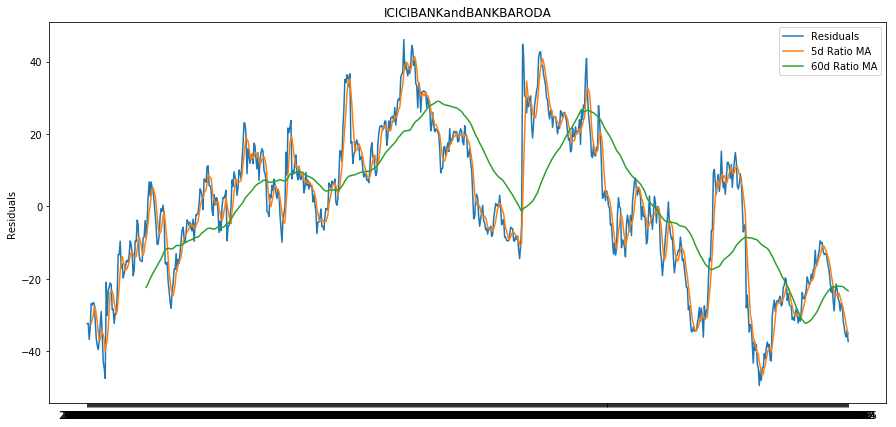

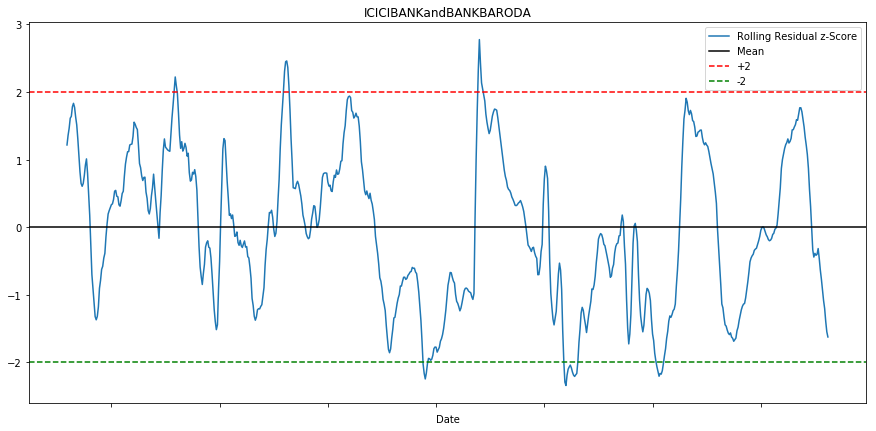

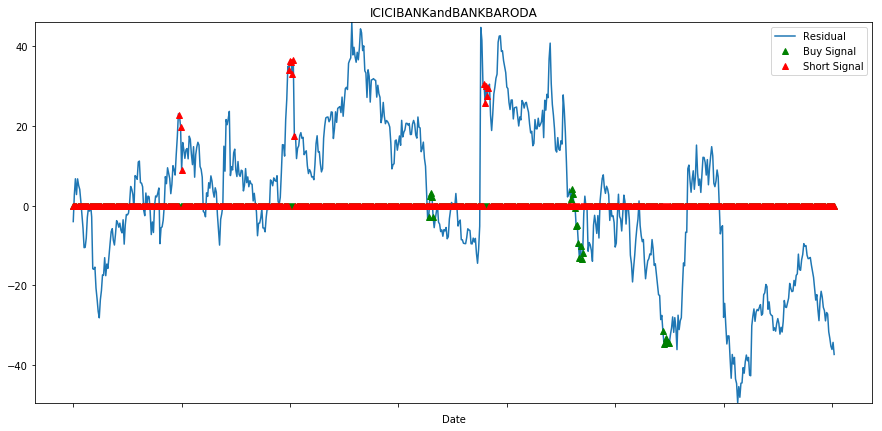

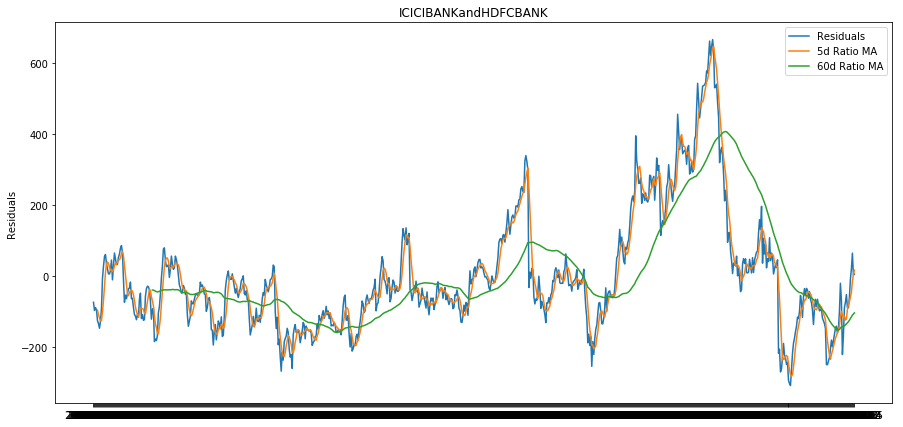

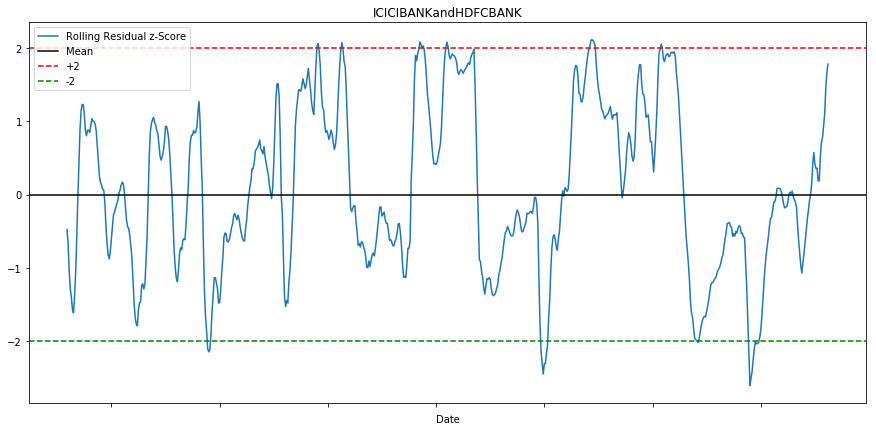

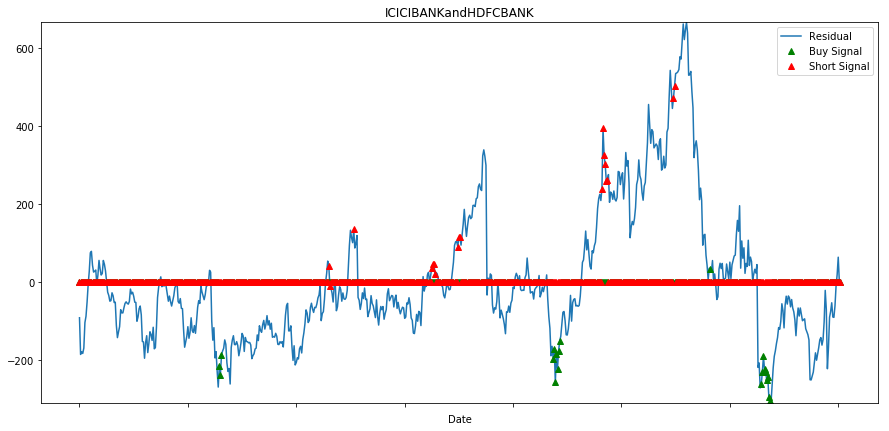

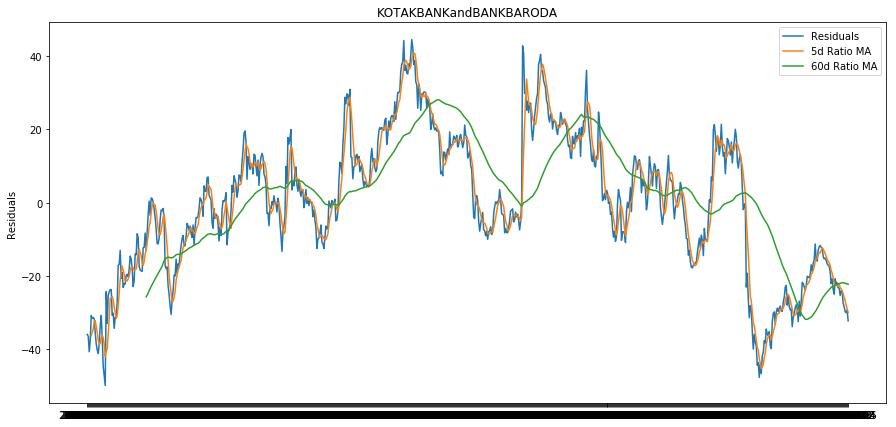

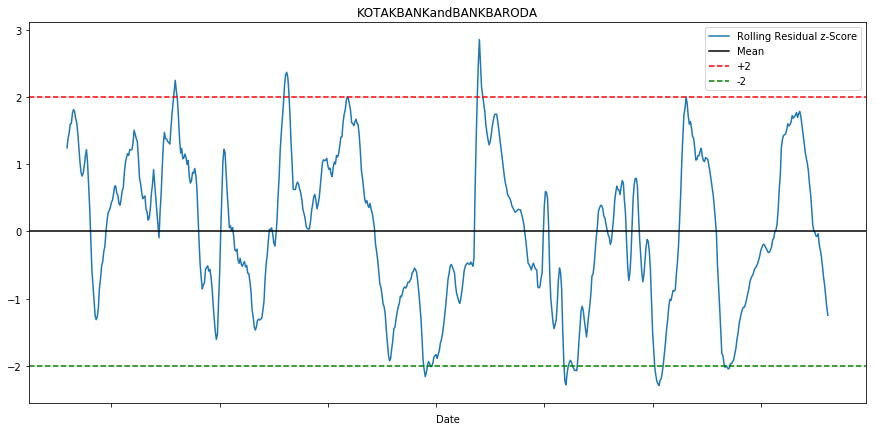

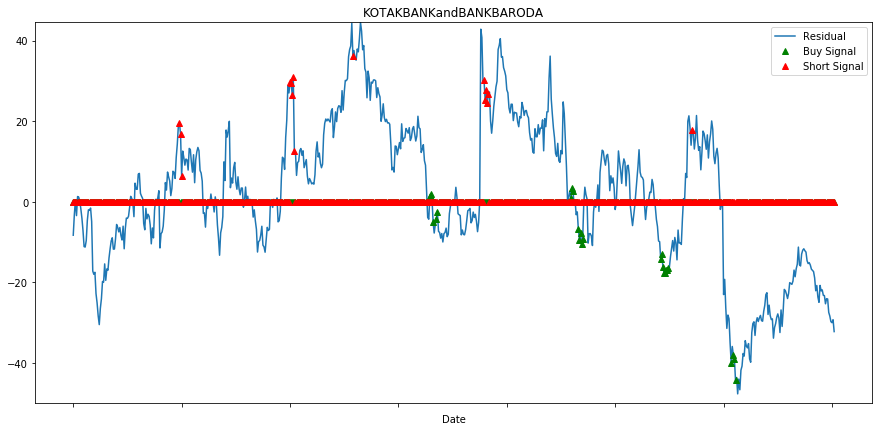

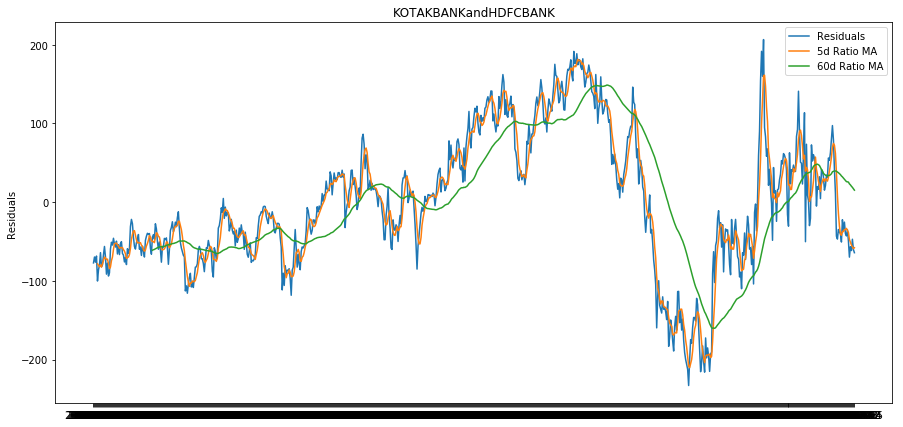

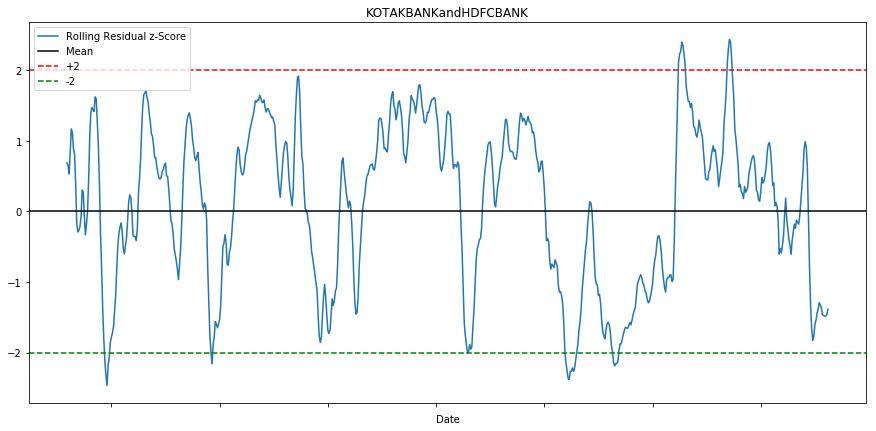

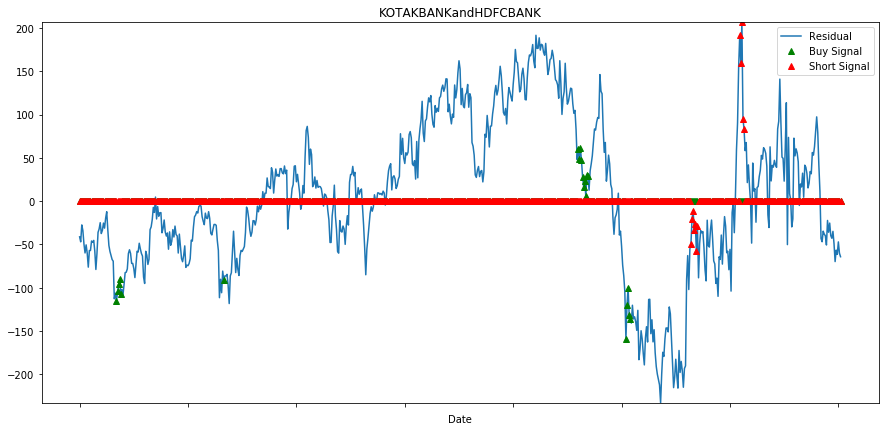

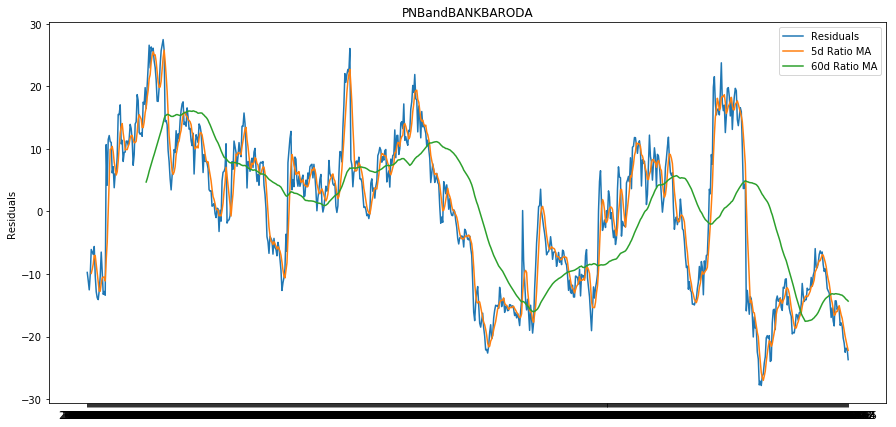

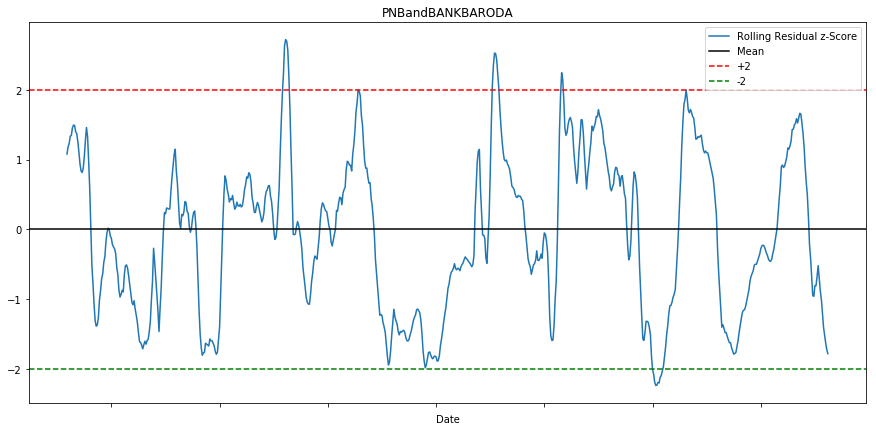

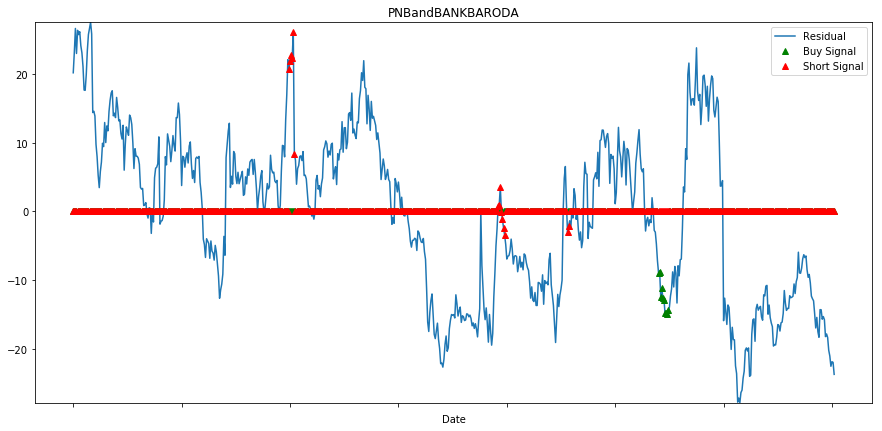

In [11]:
for i in paircount:
        pp=residuals[i]

#We are using rolling mean and standard deviation for updating mean and SD in rolling basis
        ratios_mavg5 = pp.rolling(window=5,center=False).mean()
        ratios_mavg60 = pp.rolling(window=60,center=False).mean()
        std_60 = pp.rolling(window=60,center=False).std()

  #Z-score is nothing but the standard deviation of the residual
        zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60

#plotting the above information in one line
        plt.figure(figsize=(15,7))
        plt.plot(pp.index, pp.values)
        plt.plot(ratios_mavg5.index, ratios_mavg5.values)
        plt.plot(ratios_mavg60.index, ratios_mavg60.values)
        plt.legend(['Residuals','5d Ratio MA', '60d Ratio MA'])
        plt.ylabel('Residuals')
        plt.title(titles[i])
        plt.show()
        plt.figure(figsize=(15,7))
        zscore_60_5.plot()
        plt.axhline(0, color='black')
        plt.axhline(2.0, color='red', linestyle='--')
        plt.axhline(-2.0, color='green', linestyle='--')
        plt.legend(['Rolling Residual z-Score', 'Mean', '+2', '-2'])
        plt.title(titles[i])
        plt.show()
        #Plotting buy and short signals
        plt.figure(figsize=(15,7))
        pp[60:].plot()
        buy = pp.copy()
        sell = pp.copy()
        buy[zscore_60_5>-2] = 0
        sell[zscore_60_5<2] = 0
        buy[60:].plot(color='g', linestyle='None', marker="^")
        sell[60:].plot(color='r', linestyle='None', marker="^")
        x1,x2,y1,y2 = plt.axis()
        plt.axis((x1,x2,pp.min(),pp.max()))
        plt.legend(['Residual', 'Buy Signal','Short Signal'])
        plt.title(titles[i])
        plt.show()

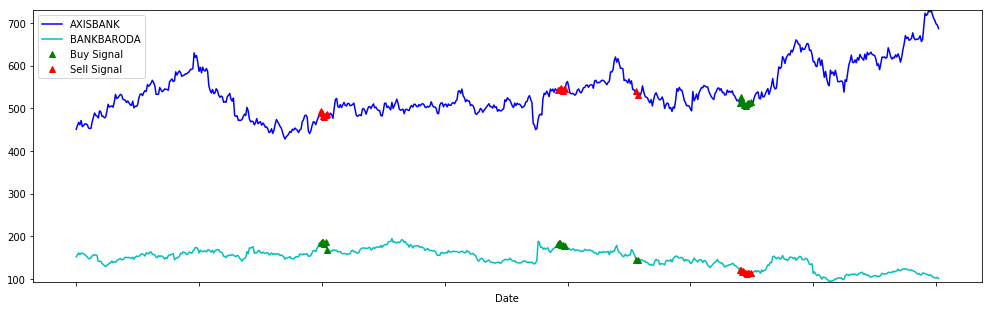

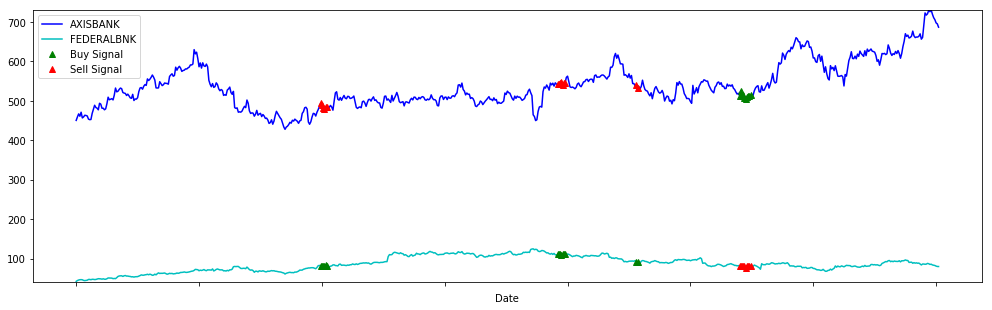

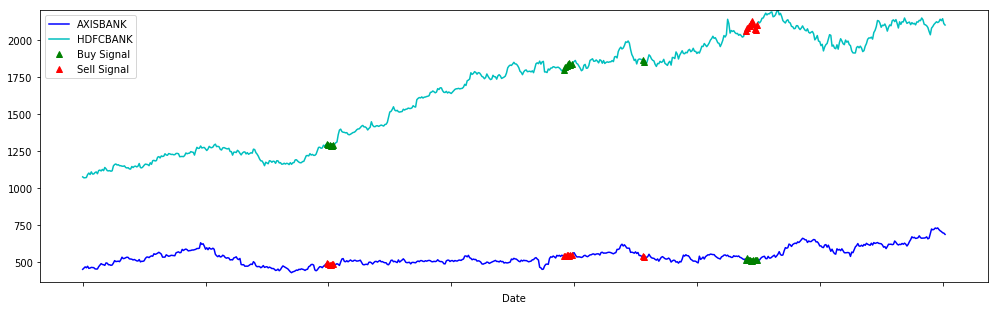

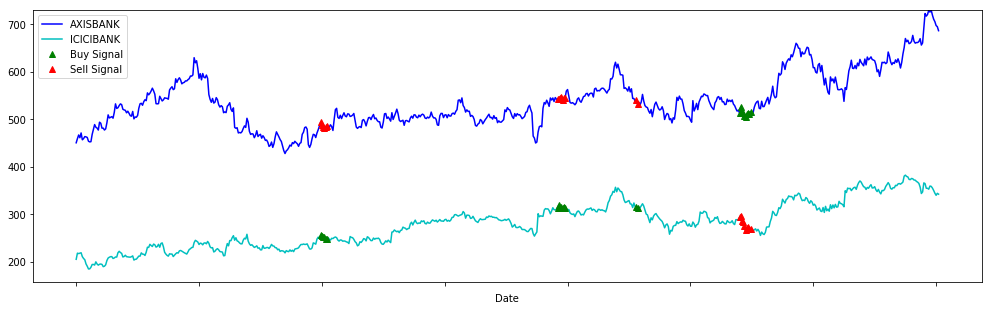

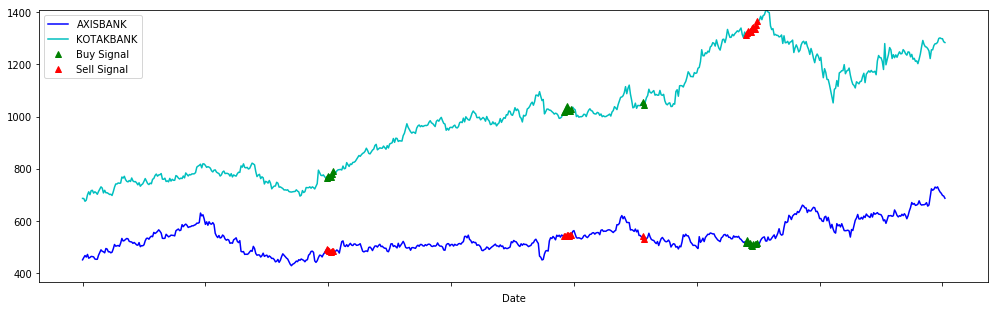

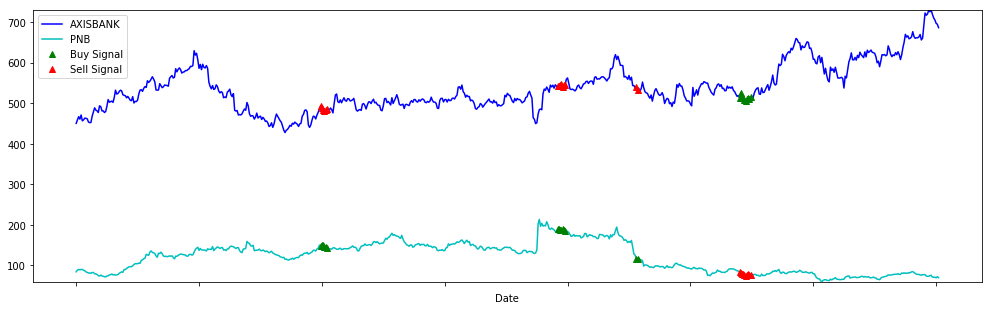

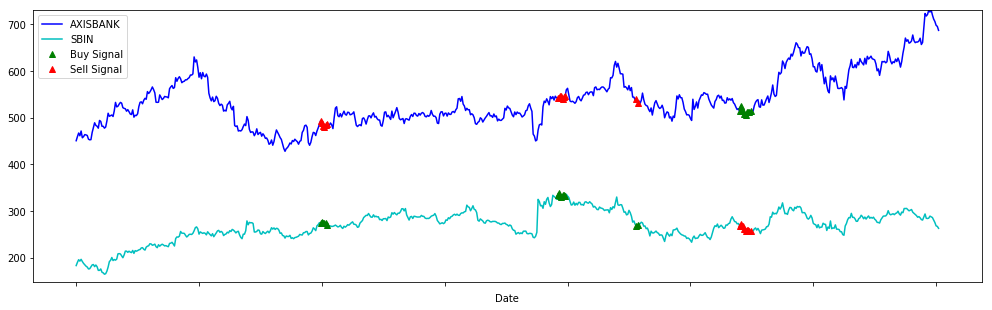

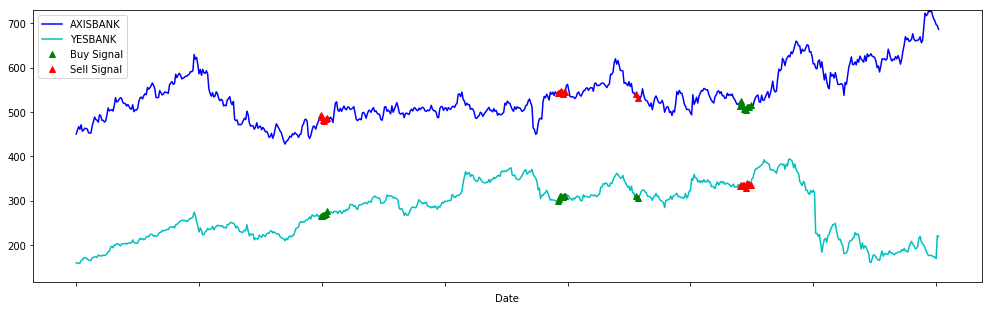

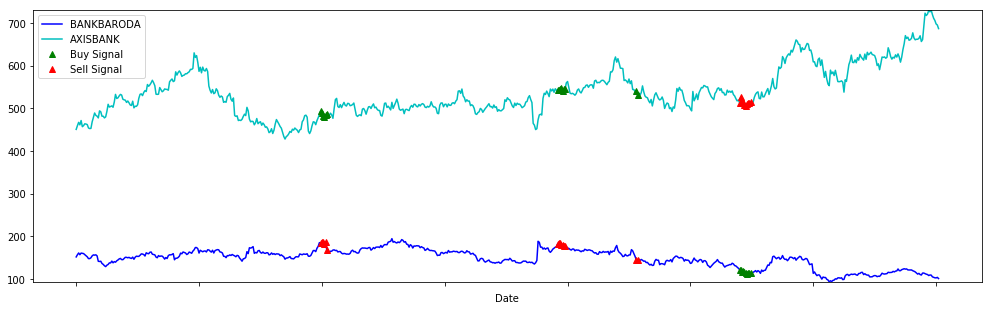

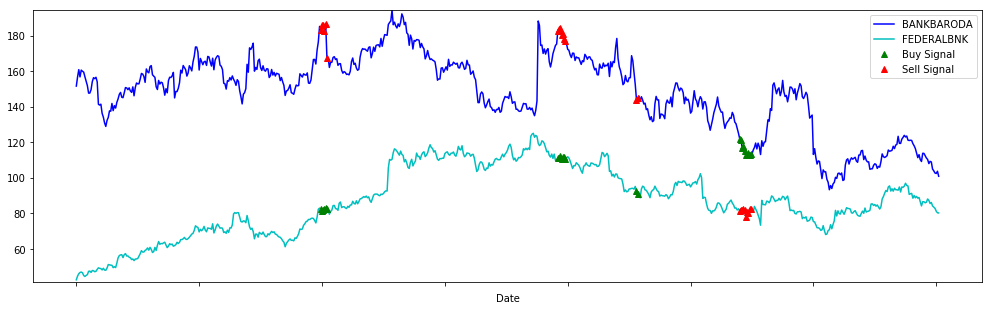

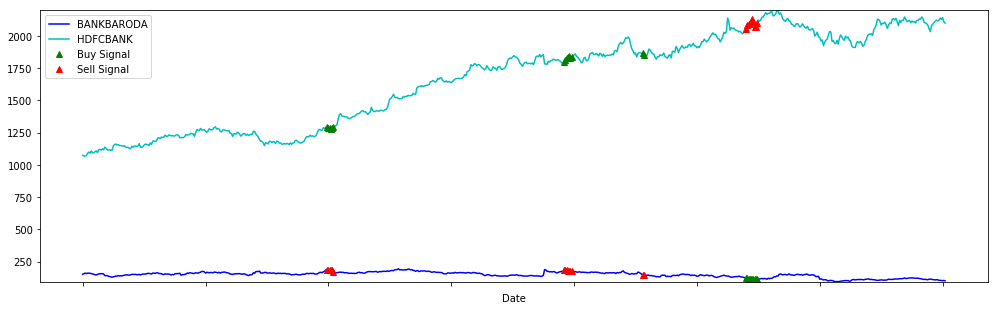

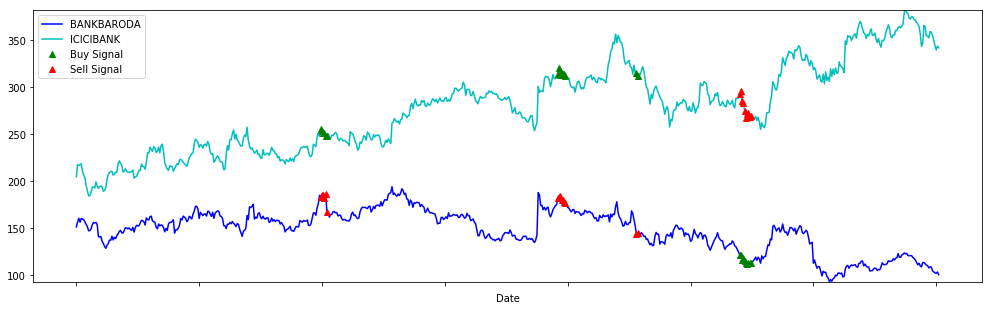

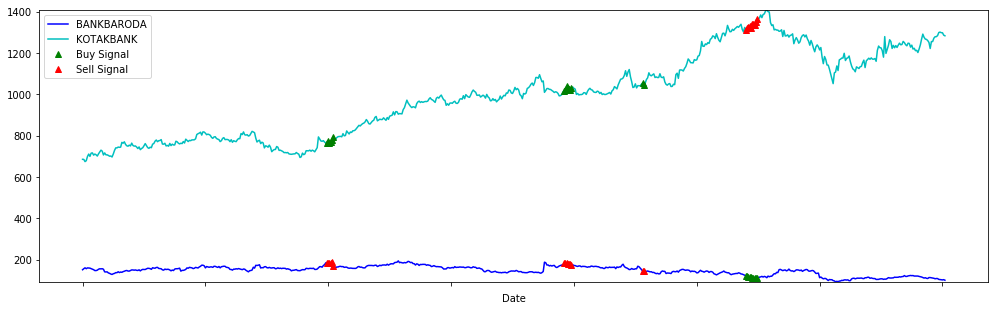

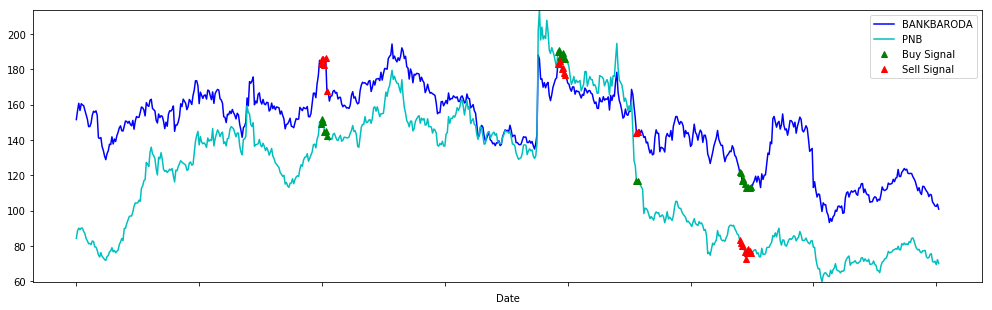

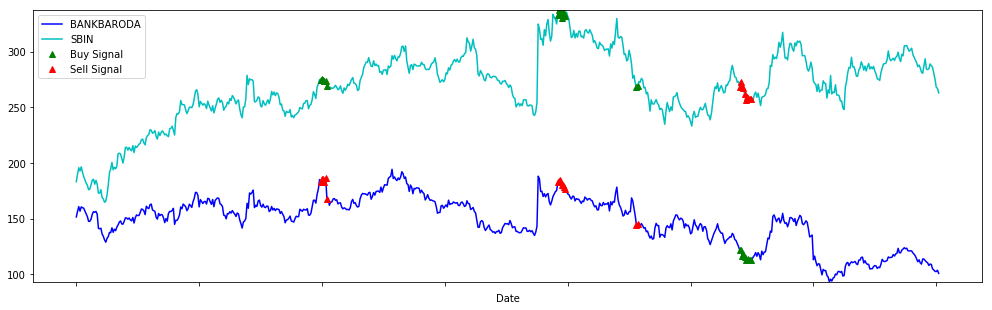

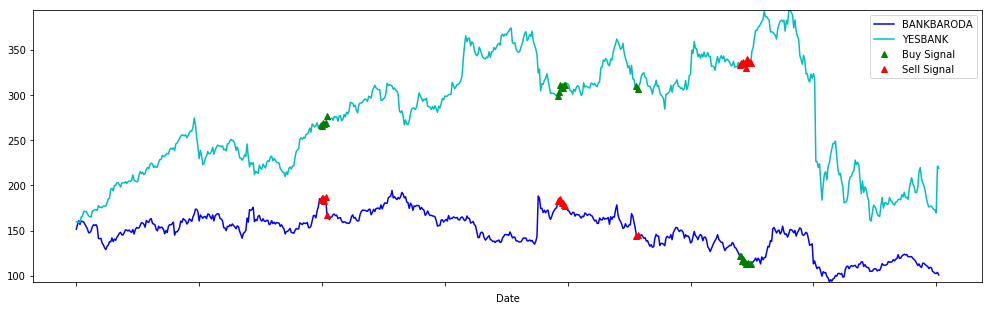

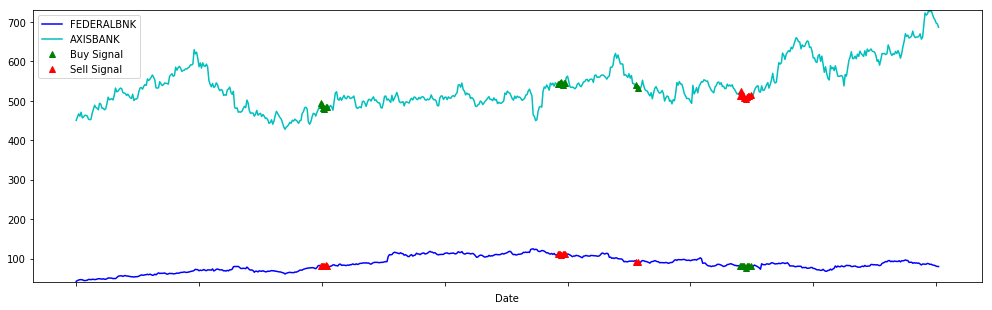

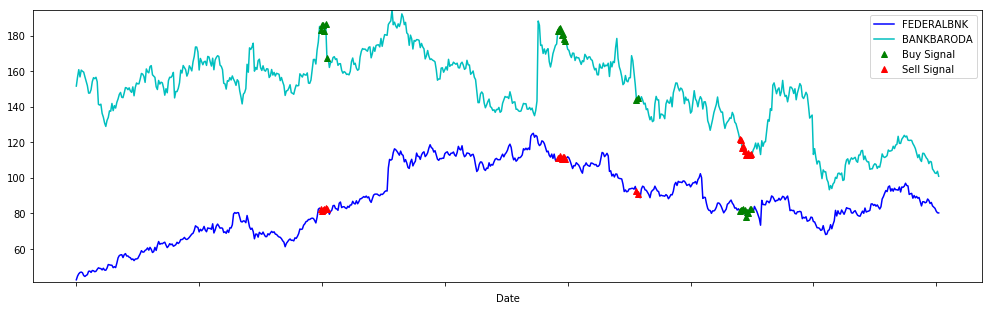

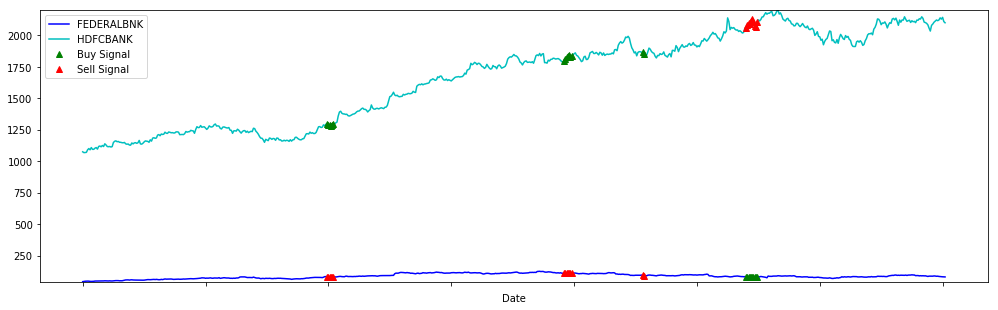

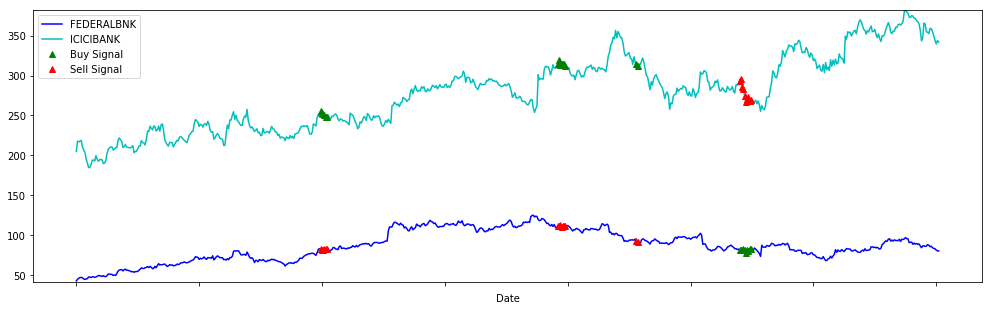

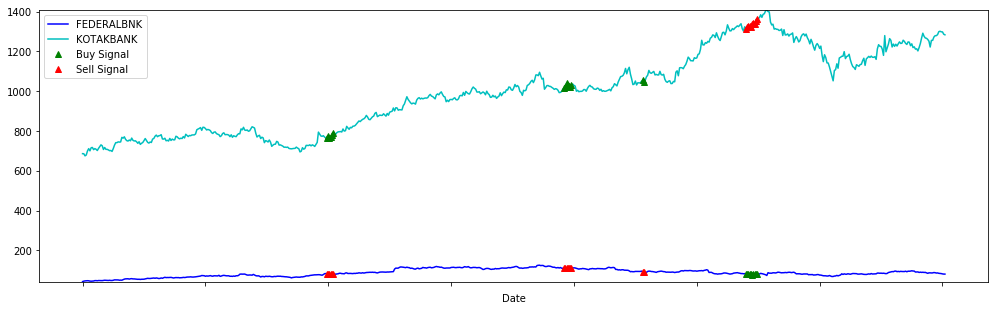

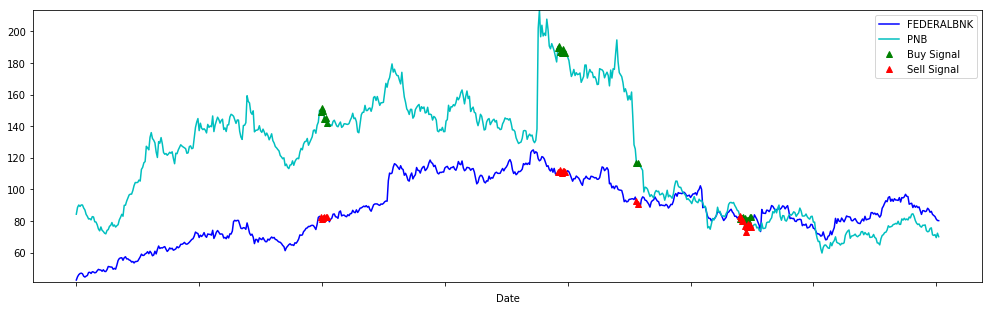

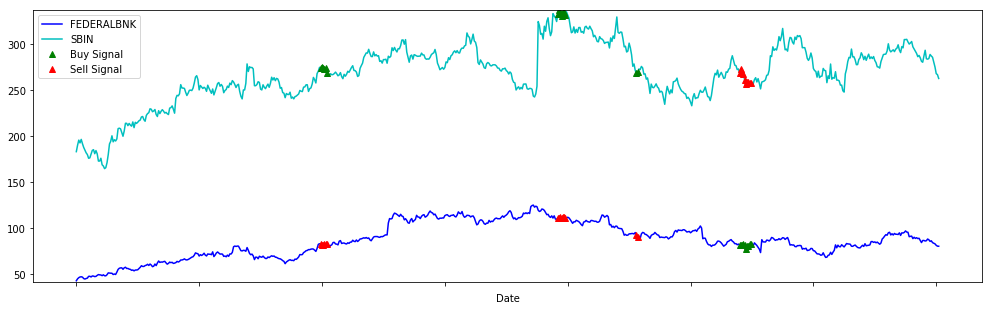

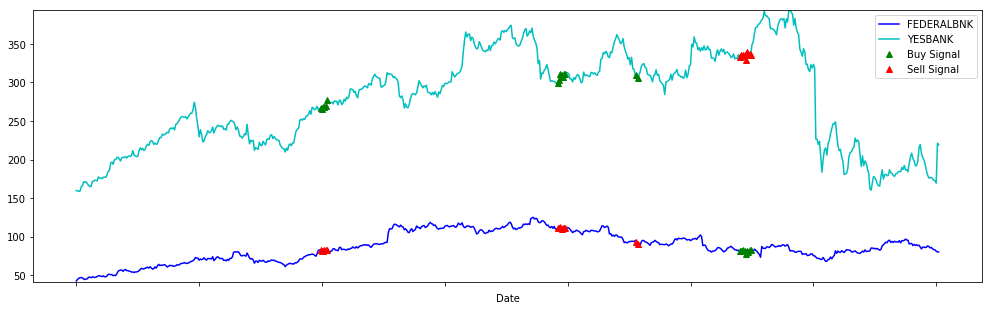

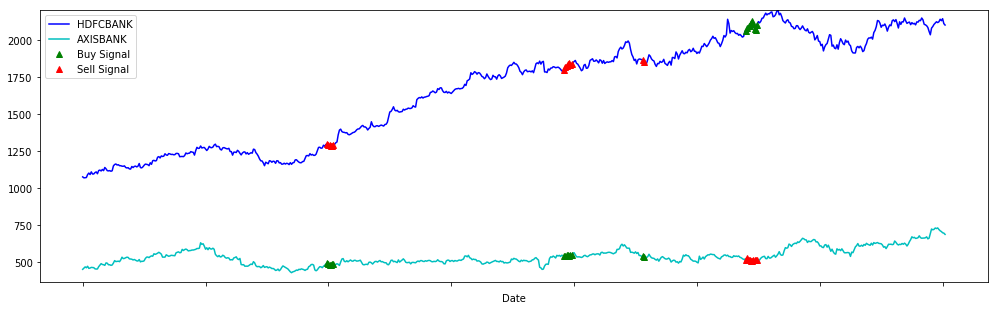

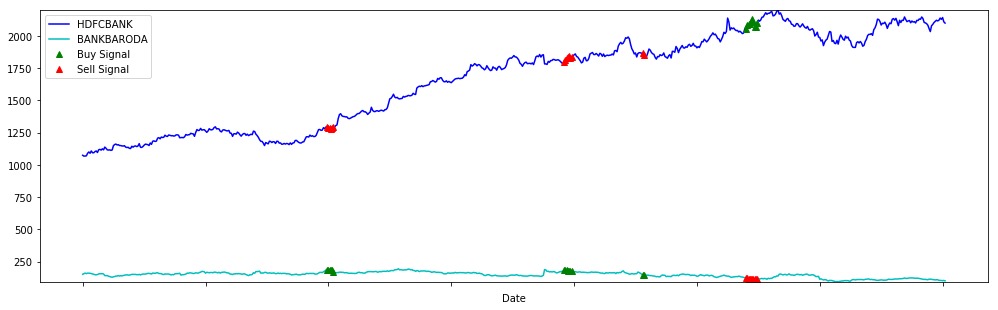

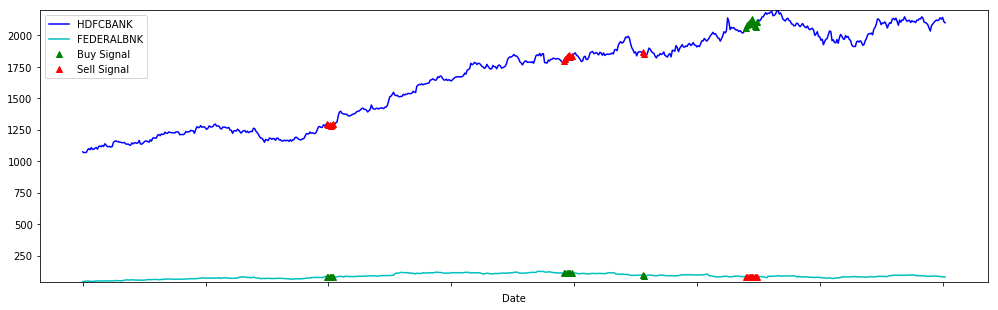

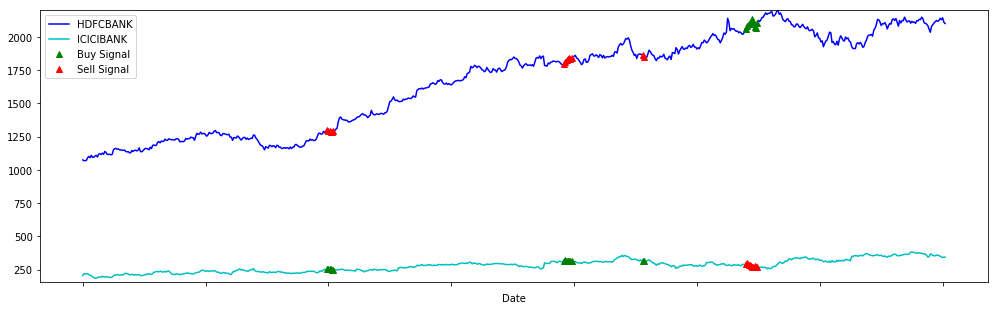

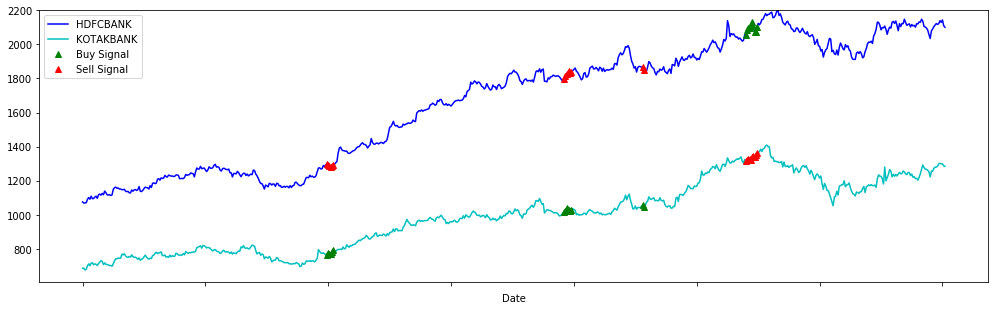

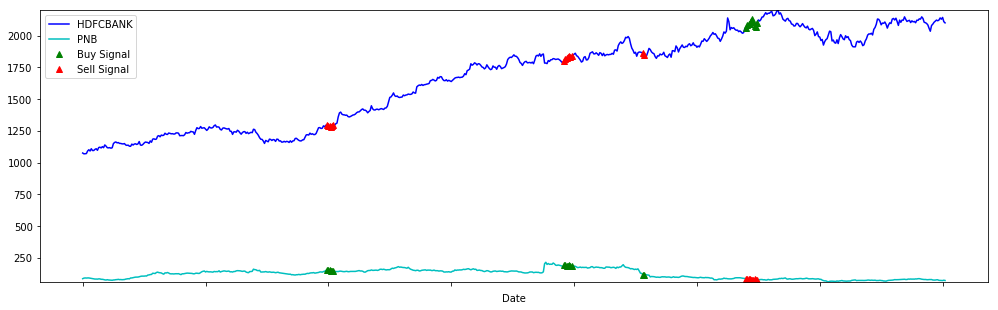

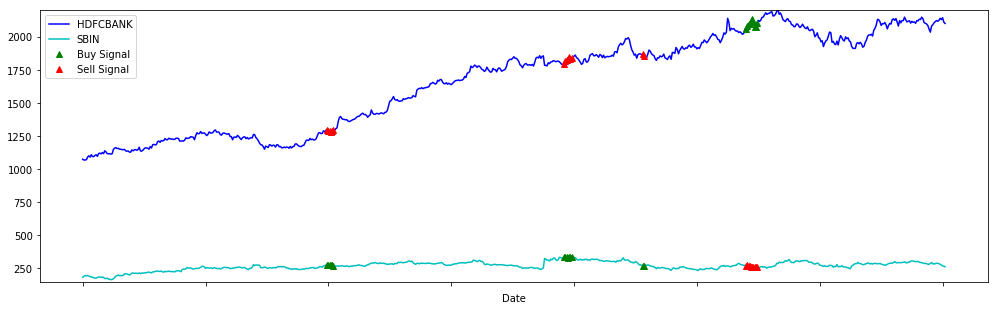

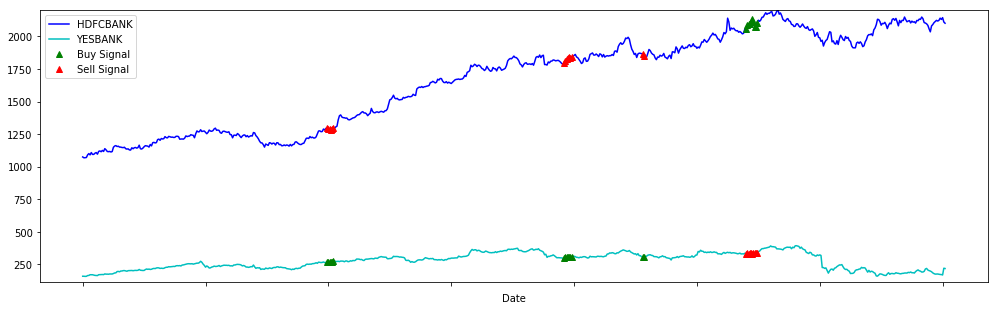

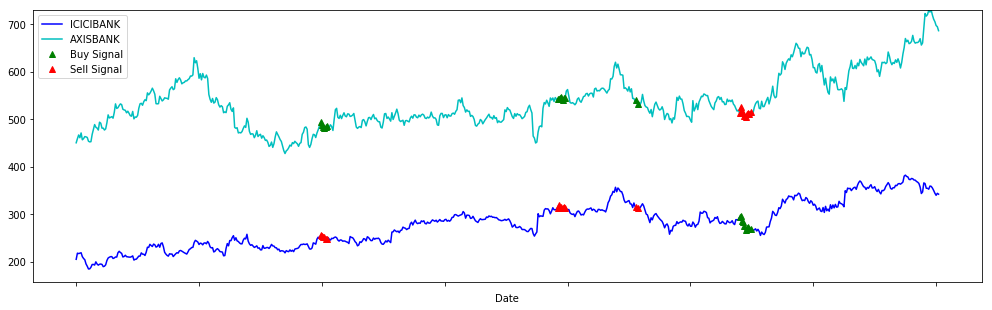

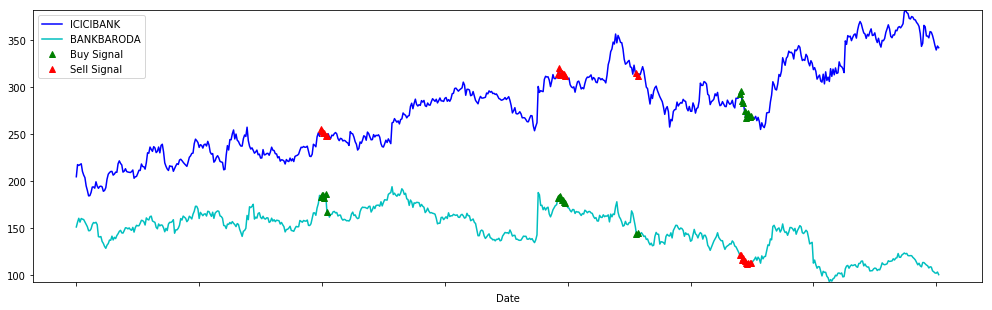

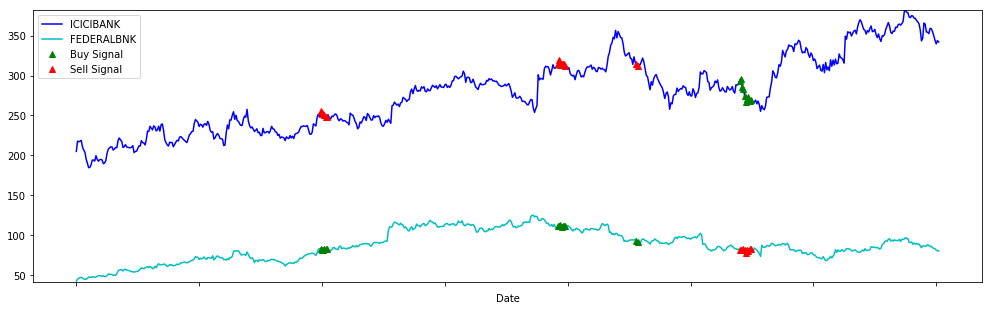

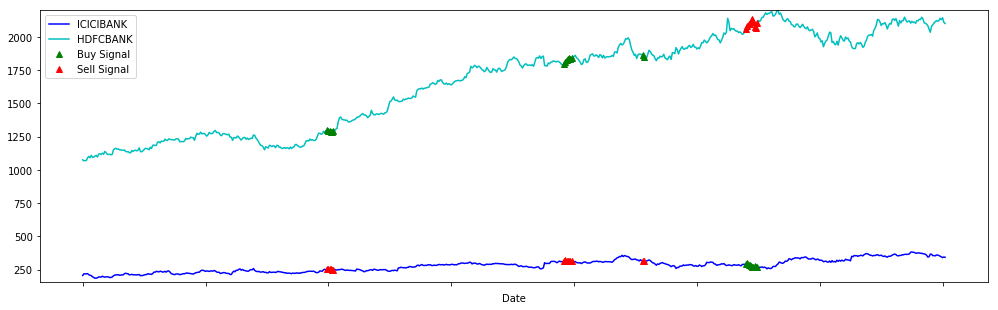

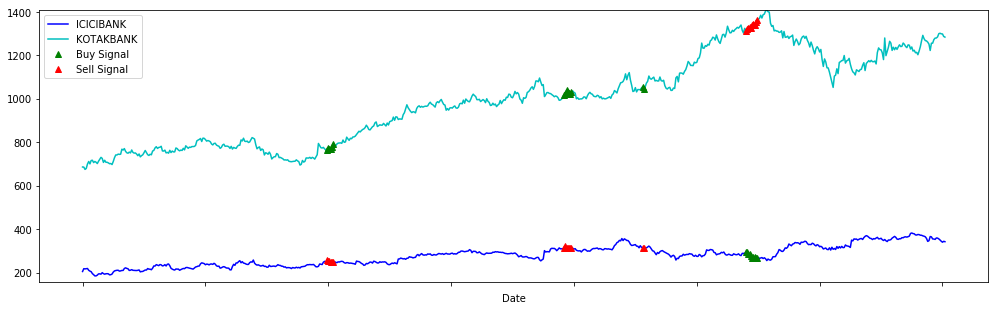

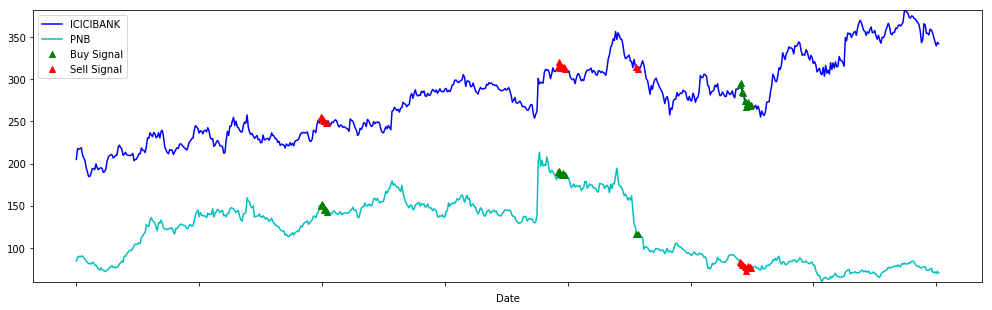

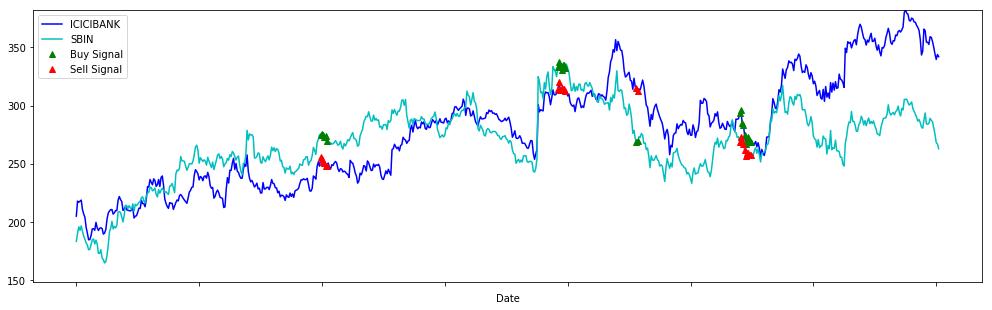

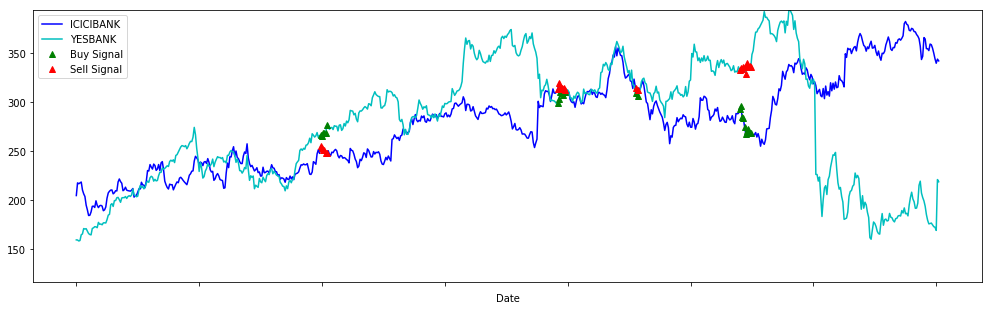

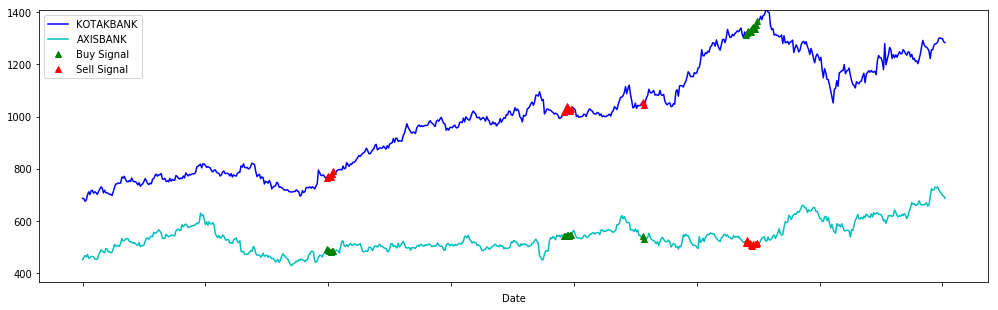

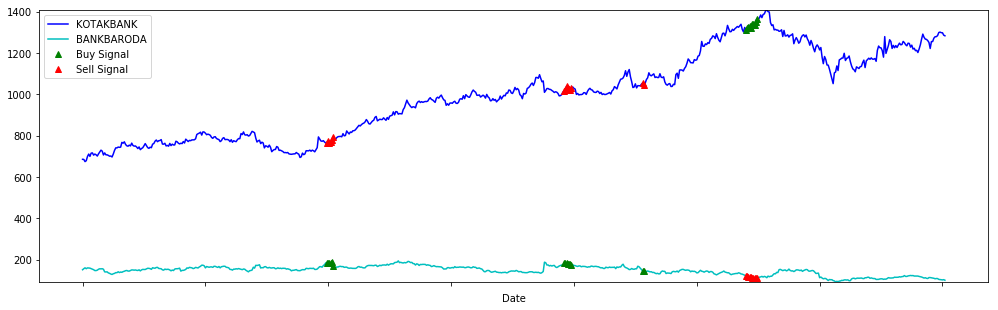

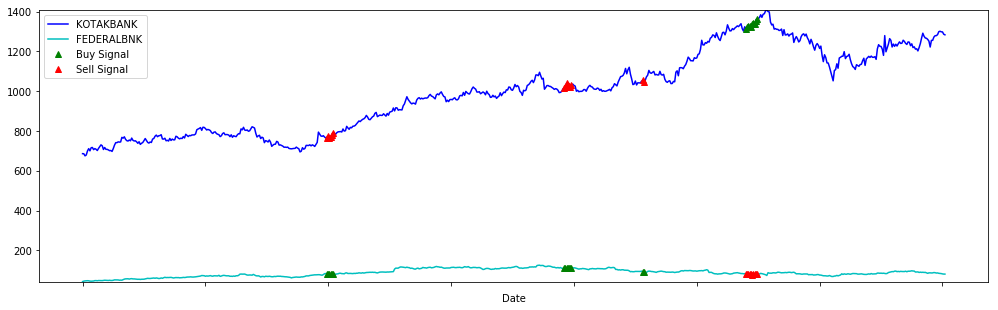

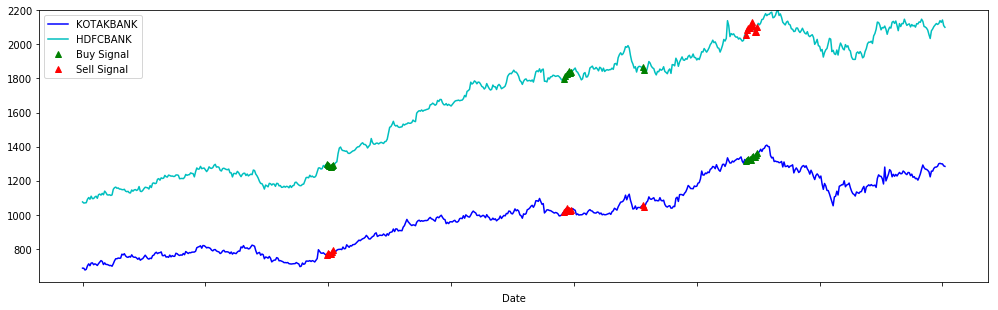

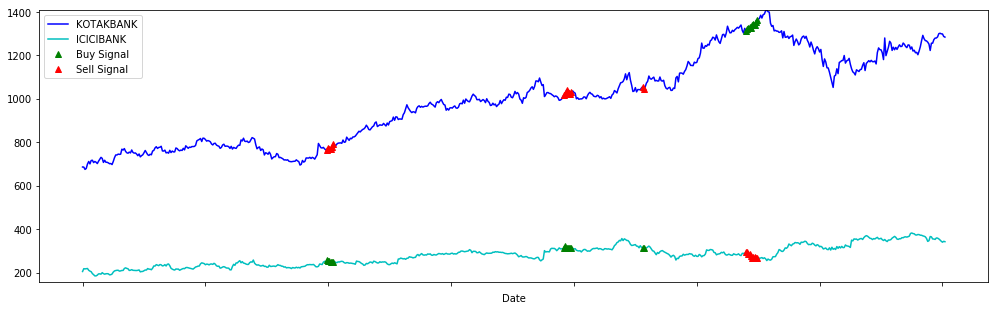

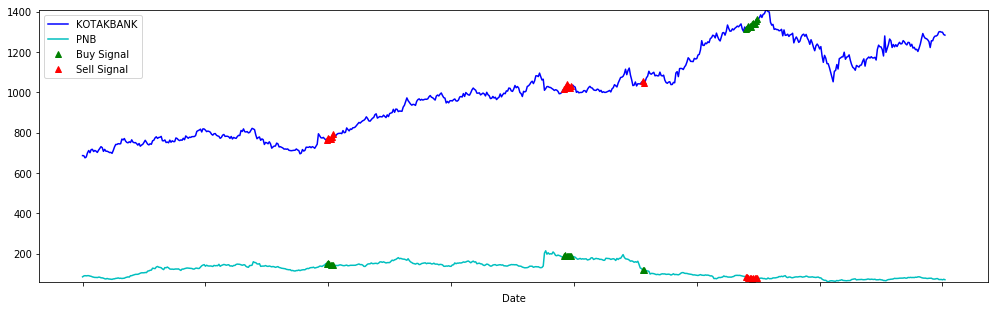

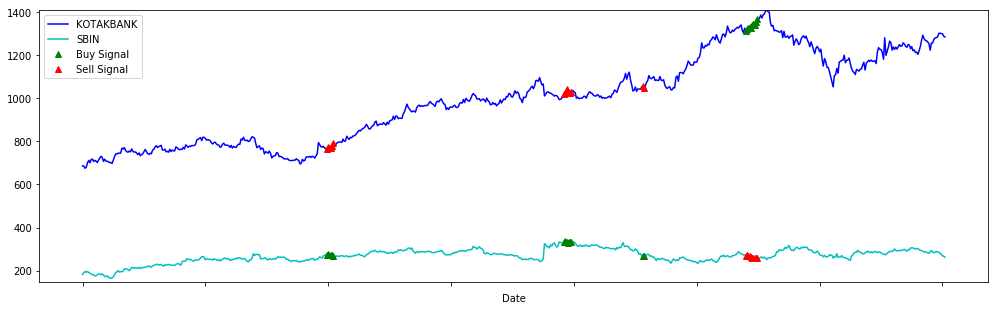

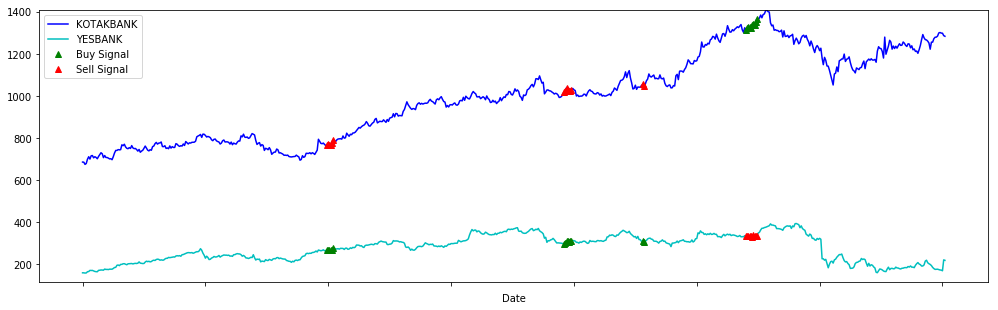

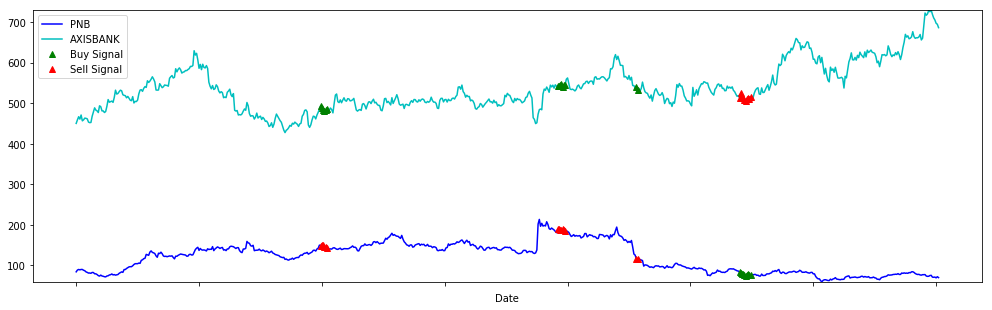

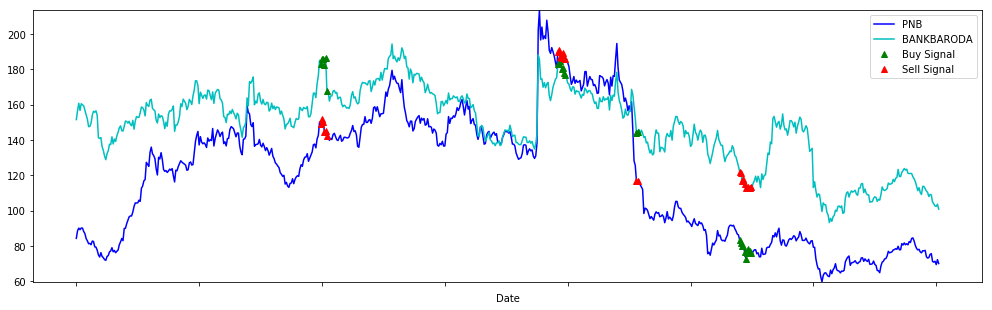

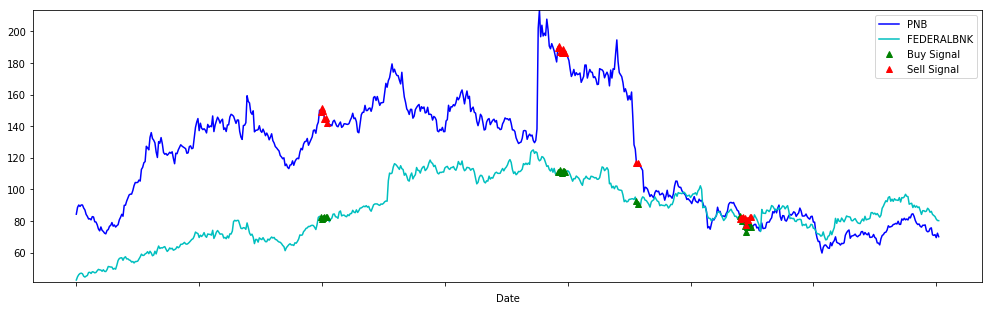

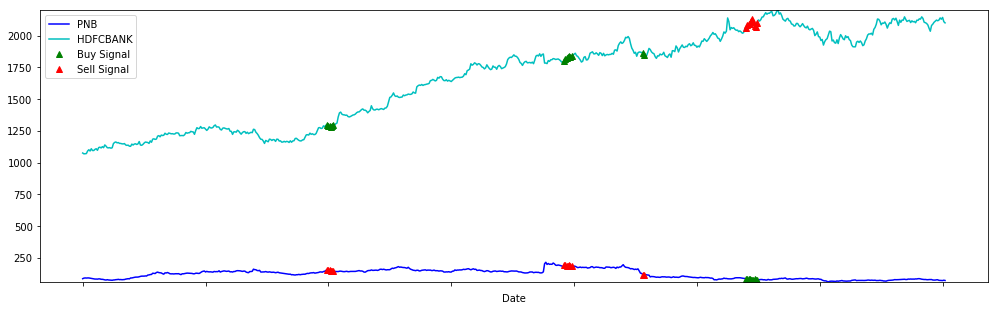

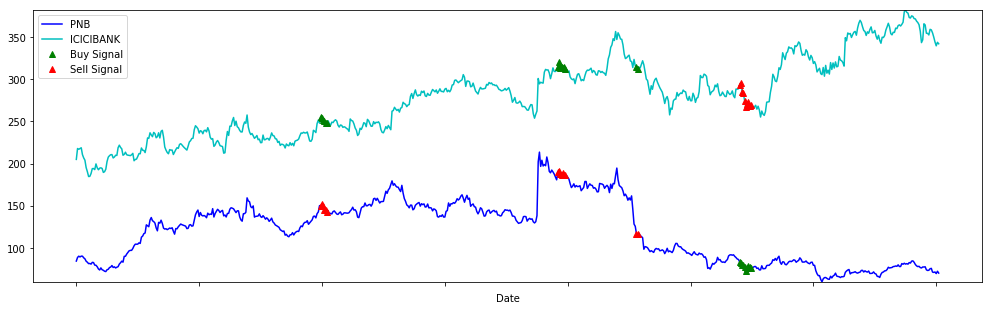

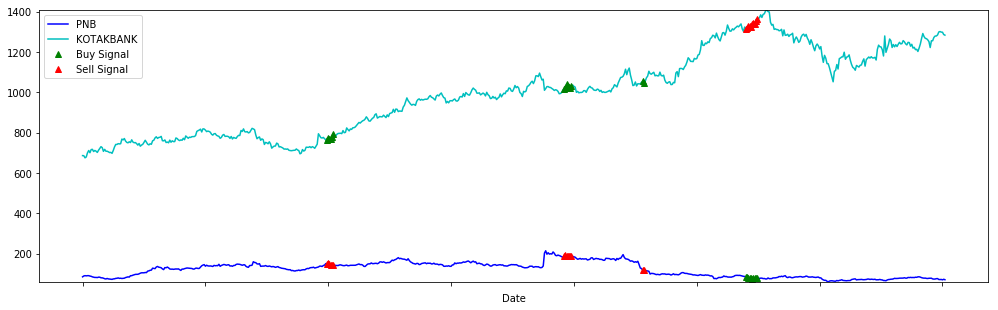

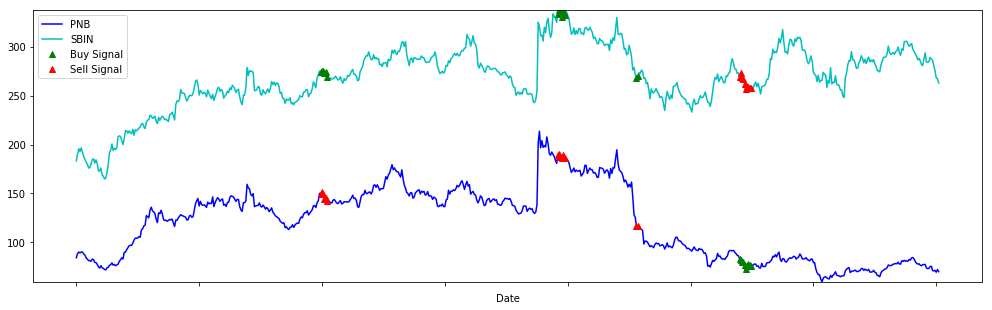

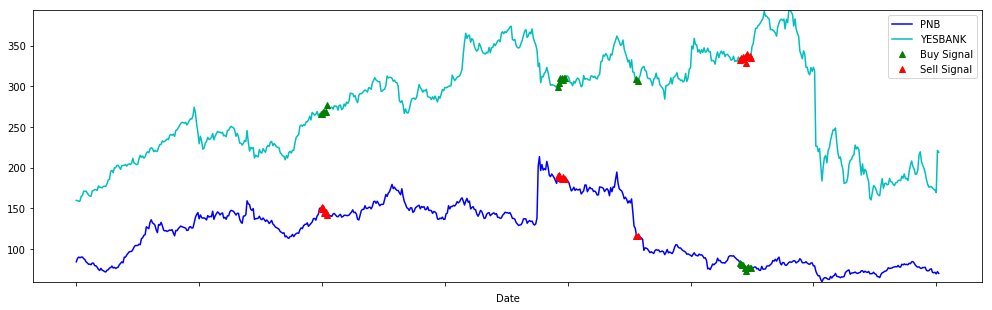

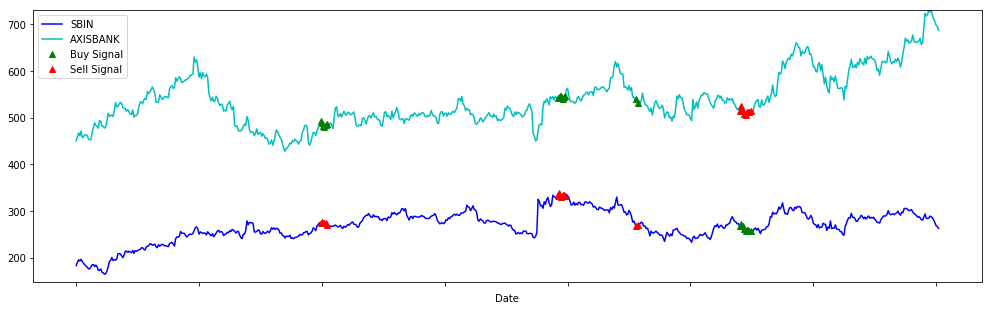

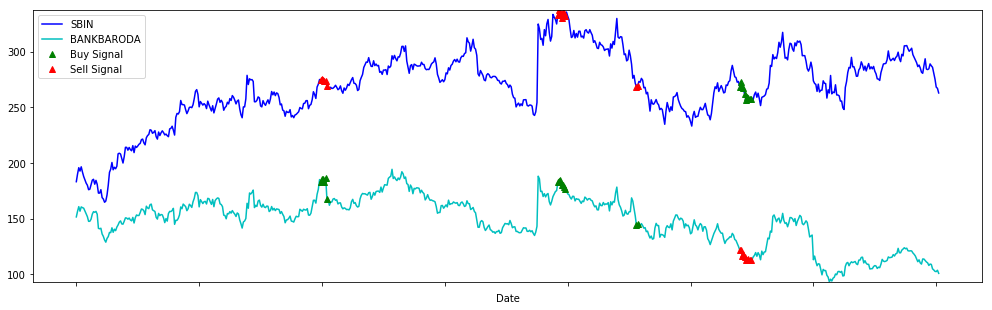

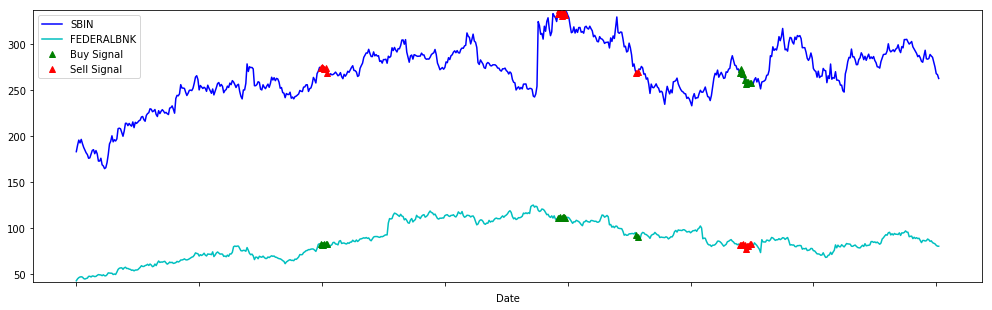

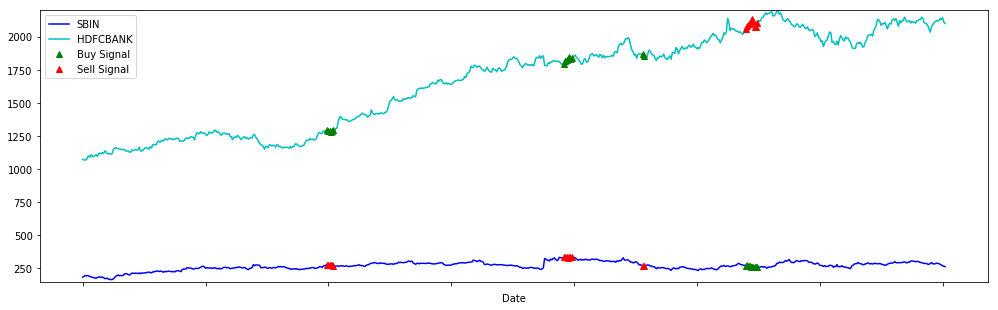

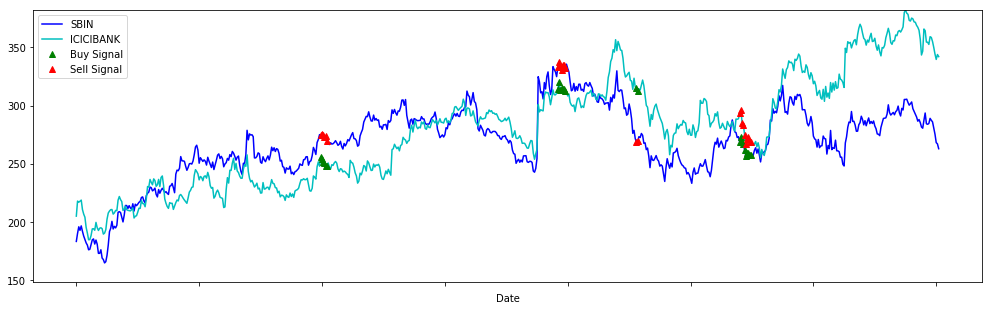

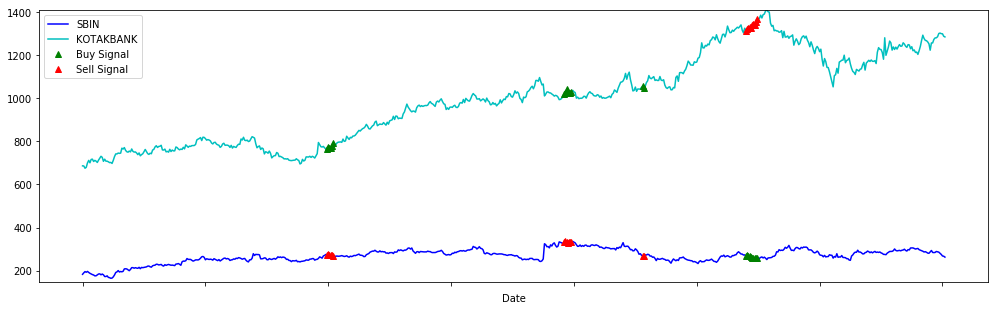

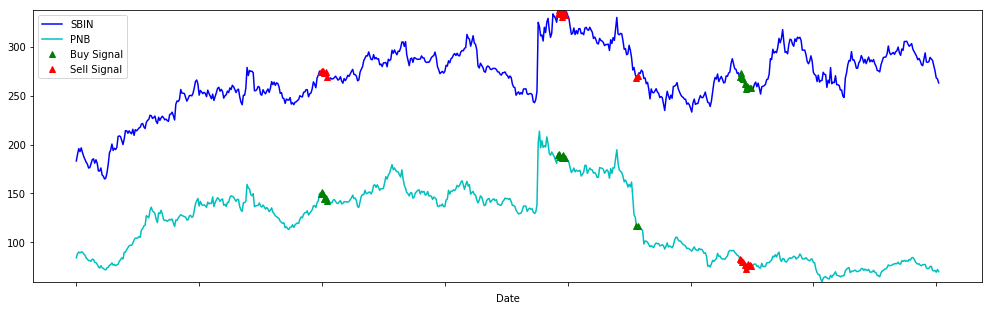

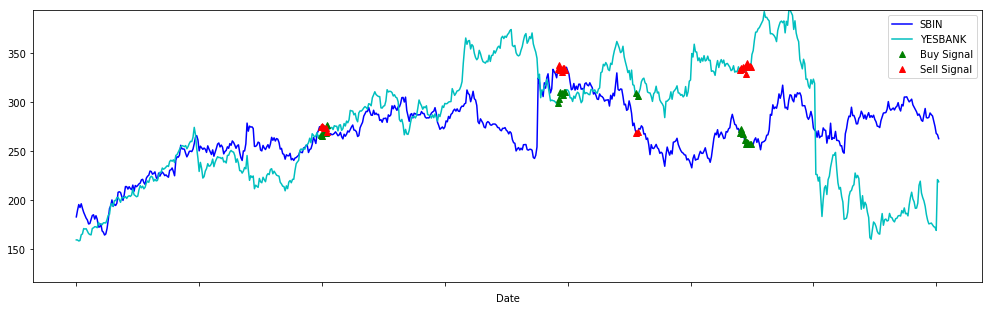

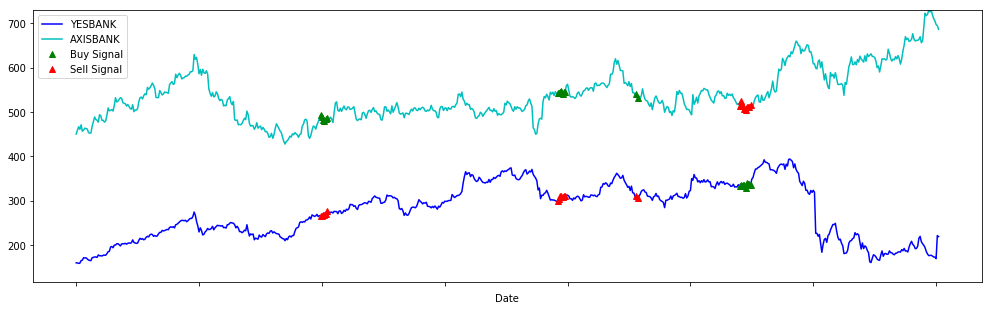

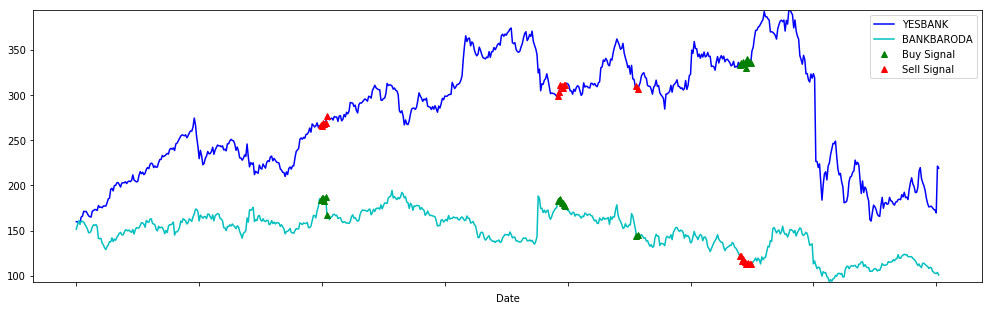

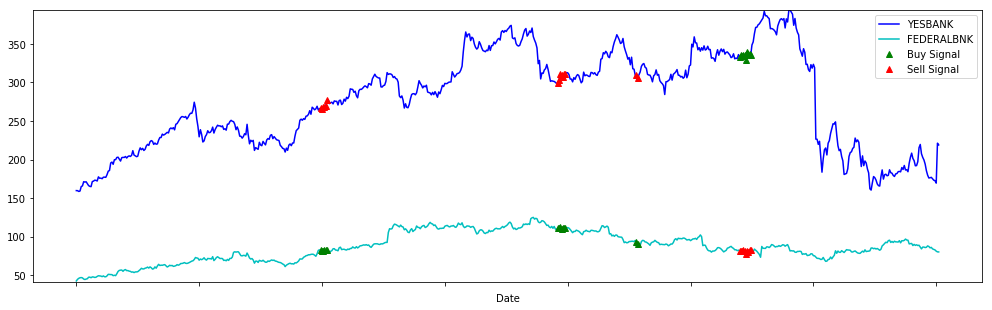

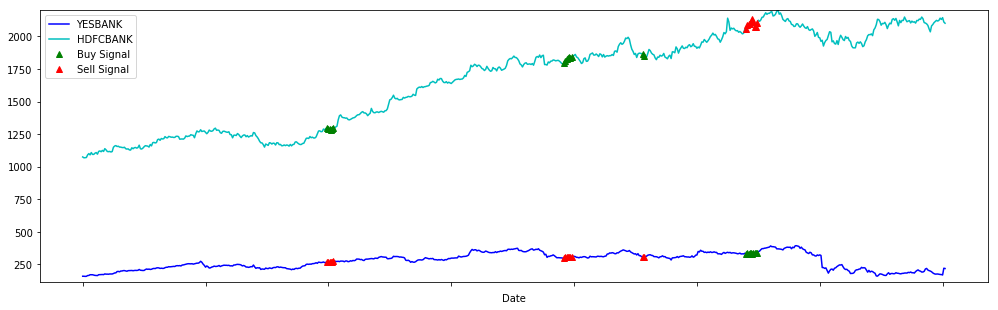

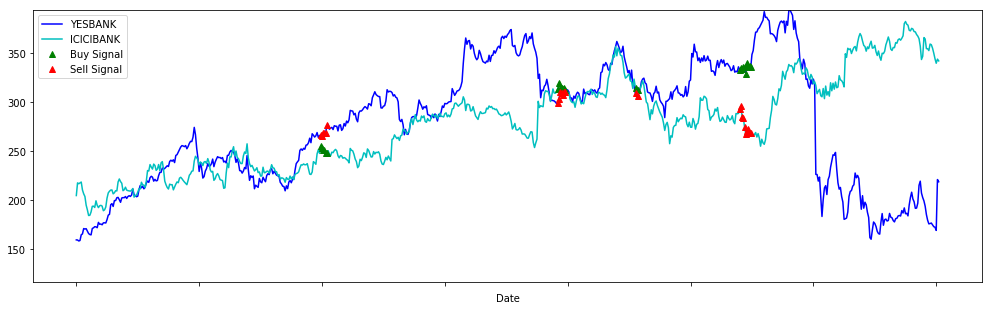

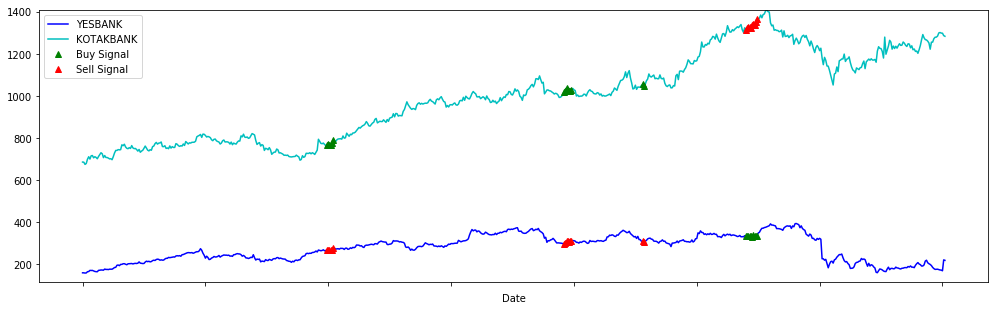

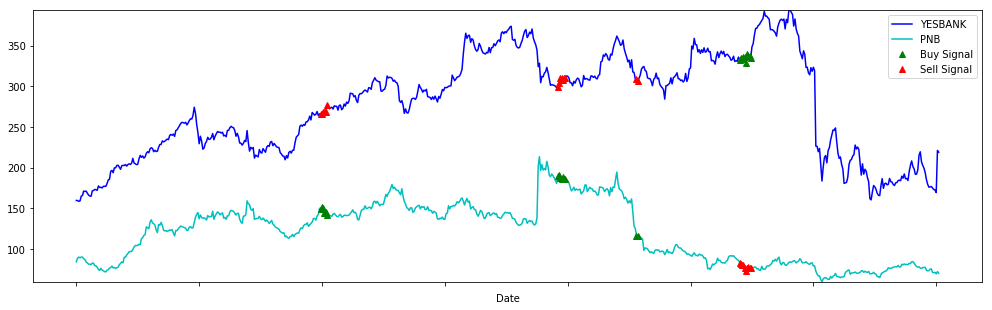

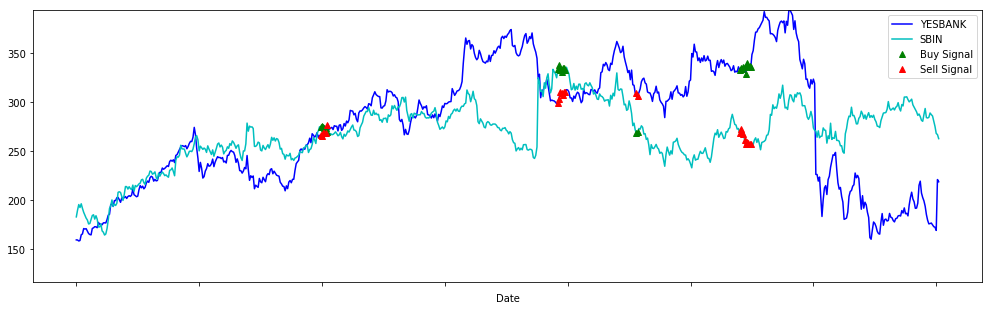

In [12]:
# Plot the prices and buy and sell signals from z score
def buy_sell(t1,t2):
        plt.figure(figsize=(17,5))

        S1 = res[t1]
        S2 = res[t2]
        S1[60:].plot(color='b')
        S2[60:].plot(color='c')
        buyR = 0*S1.copy()
        sellR = 0*S1.copy()
# When buying the ratio, buy S1 and sell S2
        buyR[buy!=0] = S1[buy!=0]
        sellR[buy!=0] = S2[buy!=0]
# When selling the ratio, sell S1 and buy S2 
        buyR[sell!=0] = S2[sell!=0]
        sellR[sell!=0] = S1[sell!=0]
        buyR[60:].plot(color='g', linestyle='None', marker='^')
        sellR[60:].plot(color='r', linestyle='None', marker='^')
        x1,x2,y1,y2 = plt.axis()
        plt.axis((x1,x2,min(S1.min(),S2.min()),max(S1.max(),S2.max())))
        plt.legend([t1,t2, 'Buy Signal', 'Sell Signal'])
        plt.show()
for i in dep:
    for j in indep:
        if i!=j:
            buy_sell(i,j)

In [13]:
#this is the linear regression profit and loss summary
def trade(S1, S2, window1, window2):
    if (window1 == 0) or (window2 == 0):
        return 0
    
    # Compute rolling mean and rolling standard deviation
    pp1 = residuals[27]
    print(pp1)
    ma1 = pp1.rolling(window=window1,center=False).mean()
    ma2 = pp1.rolling(window=window2,center=False).mean()
    std = pp1.rolling(window=window2,center=False).std()
    
    zscore = (ma1 - ma2)/std
    
   # Starting with no money and position
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(pp1)):
        # Sell short if the z-score is > 1
        if zscore[i] > 1.5:
            money += S1[i] - S2[i] * coef[27]
            countS1 -= 1
            countS2 += coef[27]
            print('Selling Ratio %s %s %s %s'%(money, coef[27], countS1,countS2))
        # Buy long if the z-score is < 1
        elif zscore[i] < -1.5:
            money -= S1[i] - S2[i] * coef[27]
            countS1 += 1
            countS2 -= coef[27]
            print('Buying Ratio %s %s %s %s'%(money,coef[27], countS1,countS2))
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.75:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0
            print('Exit pos %s %s %s %s'%(money,coef[27], countS1,countS2))
            
            
    return money
#Manually changing the stock pairs according to the co-integration results
PL=trade(res['HDFCBANK'],res['ICICIBANK'], 60, 5)
print('Profit and Loss',PL)

'''
PROFITS:
HDFC BANK AND ICICI BANK = Rs. 17313.5459
FEDERAL BANK AND SBIN = Rs. 8302.90
KOTAK AND BARODA = Rs. 3297.148
AXIS BANK AND BARODA = Rs. 1345.533
HDFC AND BARODA = Rs. 13973.648

TOTAL PROFIT = Rs. 44,232.75

LOSS:
HDFC AND KOTAK = -13932.801
ICICI AND BARODA= -1358.500
PNB AND BARODA= -3723.402

TOTAL LOSS = Rs. -19,017.7

OVERALL PROFIT AND LOSS = Rs. 25,215.05 
'''


Date
2016-01-18    -6.232167
2016-01-19    -2.530722
2016-01-20    -4.229523
2016-01-21    -3.143653
2016-01-22     1.556309
2016-01-25     3.128490
2016-01-27     4.847754
2016-01-28     1.779917
2016-01-29    -2.969447
2016-02-01   -15.276811
2016-02-02   -20.435882
2016-02-03   -24.739667
2016-02-04   -25.451648
2016-02-05   -21.466397
2016-02-08   -19.929271
2016-02-09   -18.050840
2016-02-10   -18.370098
2016-02-11   -20.854457
2016-02-12   -25.305224
2016-02-15   -16.995979
2016-02-16   -22.919650
2016-02-17   -28.125976
2016-02-18   -25.178557
2016-02-19   -22.879420
2016-02-22   -23.116283
2016-02-23   -26.482763
2016-02-24   -28.395273
2016-02-25   -31.026010
2016-02-26   -31.622964
2016-02-29   -28.371591
                ...    
2019-01-07    36.011162
2019-01-08    50.569837
2019-01-09    51.021105
2019-01-10    49.262739
2019-01-11    47.906530
2019-01-14    43.931150
2019-01-15    40.911808
2019-01-16    43.664895
2019-01-17    41.519273
2019-01-18    39.164193
2019-01-21 

Buying Ratio [-62223.7895725] [0.11947339] 37 [-4.42051531]
Buying Ratio [-63837.74538524] [0.11947339] 38 [-4.5399887]
Buying Ratio [-65446.54921929] [0.11947339] 39 [-4.65946209]
Buying Ratio [-67050.38819949] [0.11947339] 40 [-4.77893547]
Buying Ratio [-68663.46177465] [0.11947339] 41 [-4.89840886]
Buying Ratio [-70286.00416851] [0.11947339] 42 [-5.01788225]
Buying Ratio [-71917.43275627] [0.11947339] 43 [-5.13735563]
Buying Ratio [-73553.09736421] [0.11947339] 44 [-5.25682902]
Buying Ratio [-75189.28898535] [0.11947339] 45 [-5.37630241]
Buying Ratio [-76827.11317965] [0.11947339] 46 [-5.49577579]
Buying Ratio [-78461.31893283] [0.11947339] 47 [-5.61524918]
Buying Ratio [-80097.29202992] [0.11947339] 48 [-5.73472257]
Buying Ratio [-81734.41046052] [0.11947339] 49 [-5.85419595]
Buying Ratio [-83380.41743506] [0.11947339] 50 [-5.97366934]
Buying Ratio [-85045.10042215] [0.11947339] 51 [-6.09314273]
Buying Ratio [-86701.81268389] [0.11947339] 52 [-6.21261611]
Buying Ratio [-88390.25387

Exit pos [4829.35393211] [0.11947339] 0 0
Exit pos [4829.35393211] [0.11947339] 0 0
Exit pos [4829.35393211] [0.11947339] 0 0
Exit pos [4829.35393211] [0.11947339] 0 0
Exit pos [4829.35393211] [0.11947339] 0 0
Selling Ratio [6903.75480264] [0.11947339] -1 [0.11947339]
Selling Ratio [8983.97970426] [0.11947339] -2 [0.23894677]
Selling Ratio [11081.80794864] [0.11947339] -3 [0.35842016]
Selling Ratio [13184.66681647] [0.11947339] -4 [0.47789355]
Selling Ratio [15253.77389463] [0.11947339] -5 [0.59736693]
Selling Ratio [17313.54597805] [0.11947339] -6 [0.71684032]
Profit and Loss [17313.54597805]
